# Clasificador Edad

En este notebook implementamos un modelo para clasificar las fotos faciales en 7 categorias de edad:
    - Menor a 20
    - 20-30
    - 30-40
    - 40-50
    - 50-60
    - 60-70
    - Mayor a 70
    
O 14 categorias:
    - Menor a 10
    - 10-15
    - 15-20
    - 20-25
    - 25-30
    - 30-35
    - 35-40
    - 40-45
    - 45-50
    - 50-55
    - 55-60
    - 60-65
    - 65-70
    - 70-100
    
    
Para esto utilizamos la tecnica llamada Transfer Learning. reutilizamos un modelo pre-entrenado para clasificar imágenes y lo adanptamos a nuestro objetivo.

# 1. Importación de librerias útiles y de los datos

Primero importamos librerías típicas para el análisis de datos (numpy, pandas...) y creamos una función para guardar las imágenes.

In [1]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import seaborn as sns
from sklearn.preprocessing import Imputer

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
import plotly.tools as tls
import squarify
from numpy import array
from matplotlib import cm
import matplotlib.image as mpimg

import datetime

# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = ""
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [2]:
import tensorflow as tf
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# 2. Training dataset

Para empezar, creamos nuestro dataset de entrenamiento. Tomamos 8 veces el numero de imagenes de nuestra categoria menos poblada. Asi tenemos la misma frecuencia por categoria en nuestro dataset. 

In [3]:
import pandas as pd
#data_wiki = pd.read_csv("./datasets/data_wiki_clean.csv", parse_dates=['birthdate'])
#data_imdb = pd.read_csv("./datasets/data_imdb_clean2.csv", parse_dates=['birthdate'])
data_imdb = pd.read_csv("./datasets/data_imdb_clean3.csv", parse_dates=['birthdate'])

In [4]:
#for i in range(1000):
    #print(len(mpimg.imread(data_imdb['full_path_crop'][i]).shape))
#data_imdb['imsize'] = data_imdb['full_path_crop'].apply(lambda x: len(mpimg.imread(x).shape))
#data_wiki['imsize'] = data_wiki['full_path_crop'].apply(lambda x: len(mpimg.imread(x).shape))
#data_imdb.to_csv( './datasets/data_imdb_clean2.csv',index=False)


In [5]:
data_imdb['imsize'].value_counts()

3    429899
2     22233
Name: imsize, dtype: int64

In [6]:
data_imdb = data_imdb[data_imdb["imsize"]>2]
data_imdb = data_imdb[data_imdb["imheight"]<500]
data_imdb = data_imdb[data_imdb["imwidth"]<500]
data_imdb.shape

(293196, 15)

In [7]:

"""

print(data_wiki[data_wiki['age']<20].shape,
      data_wiki[(data_wiki['age']>20) & (data_wiki['age']<25)].shape,
      data_wiki[(data_wiki['age']>25) & (data_wiki['age']<30)].shape,
      data_wiki[(data_wiki['age']>30) & (data_wiki['age']<35)].shape,
      data_wiki[(data_wiki['age']>35) & (data_wiki['age']<40)].shape,
      data_wiki[(data_wiki['age']>40) & (data_wiki['age']<45)].shape,
      data_wiki[(data_wiki['age']>45) & (data_wiki['age']<50)].shape,
      data_wiki[(data_wiki['age']>50) & (data_wiki['age']<55)].shape,
      data_wiki[(data_wiki['age']>55) & (data_wiki['age']<60)].shape,
      data_wiki[(data_wiki['age']>60) & (data_wiki['age']<65)].shape,
      data_wiki[(data_wiki['age']>65) & (data_wiki['age']<70)].shape,
      data_wiki[(data_wiki['age']>70) & (data_wiki['age']<80)].shape,
     )

print('0', data_imdb[data_imdb['age']<10].shape,
      '1', data_imdb[(data_imdb['age']>10) & (data_imdb['age']<15)].shape,
      '2', data_imdb[(data_imdb['age']>15) & (data_imdb['age']<20)].shape,
      '3', data_imdb[(data_imdb['age']>20) & (data_imdb['age']<25)].shape,
      '4', data_imdb[(data_imdb['age']>25) & (data_imdb['age']<30)].shape,
      '5', data_imdb[(data_imdb['age']>30) & (data_imdb['age']<35)].shape,
      '6', data_imdb[(data_imdb['age']>35) & (data_imdb['age']<40)].shape,
      '7', data_imdb[(data_imdb['age']>40) & (data_imdb['age']<45)].shape,
      '8', data_imdb[(data_imdb['age']>45) & (data_imdb['age']<50)].shape,
      '9', data_imdb[(data_imdb['age']>50) & (data_imdb['age']<55)].shape,
      '10', data_imdb[(data_imdb['age']>55) & (data_imdb['age']<60)].shape,
      '11', data_imdb[(data_imdb['age']>60) & (data_imdb['age']<65)].shape,
      '12', data_imdb[(data_imdb['age']>65) & (data_imdb['age']<70)].shape,
      '13', data_imdb[(data_imdb['age']>70) & (data_imdb['age']<90)].shape,
     )



     print(data_imdb[(data_imdb['age']>0) & (data_imdb['age']<=20)& (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].shape,
      data_imdb[(data_imdb['age']>20) & (data_imdb['age']<=30)& (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].shape,
      data_imdb[(data_imdb['age']>30) & (data_imdb['age']<=40)& (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].shape,
      data_imdb[(data_imdb['age']>40) & (data_imdb['age']<=50)& (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].shape,
      data_imdb[(data_imdb['age']>50) & (data_imdb['age']<=60)& (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].shape,
      data_imdb[(data_imdb['age']>60) & (data_imdb['age']<=70)& (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].shape,
      data_imdb[(data_imdb['age']>70) & (data_imdb['age']<=100)& (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].shape,
     )
     
"""
print('0' , data_imdb[(data_imdb['age']>0)  & (data_imdb['age']<=10) &  (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].shape,
      '1' , data_imdb[(data_imdb['age']>10) & (data_imdb['age']<=15) &  (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].shape,
      '2' , data_imdb[(data_imdb['age']>15) & (data_imdb['age']<=20) &  (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].shape,
      '3' , data_imdb[(data_imdb['age']>20) & (data_imdb['age']<=25) &  (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].shape,
      '4' , data_imdb[(data_imdb['age']>25) & (data_imdb['age']<=30) &  (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].shape,
      '5' , data_imdb[(data_imdb['age']>30) & (data_imdb['age']<=35) &  (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].shape,
      '6' , data_imdb[(data_imdb['age']>35) & (data_imdb['age']<=40) &  (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].shape,
      '7' , data_imdb[(data_imdb['age']>40) & (data_imdb['age']<=45) &  (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].shape,
      '8' , data_imdb[(data_imdb['age']>45) & (data_imdb['age']<=50) &  (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].shape,
      '9' , data_imdb[(data_imdb['age']>50) & (data_imdb['age']<=55) &  (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].shape,
      '10' , data_imdb[(data_imdb['age']>55) & (data_imdb['age']<=60) &  (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].shape,
      '11' , data_imdb[(data_imdb['age']>60) & (data_imdb['age']<=65) &  (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].shape,
      '12' , data_imdb[(data_imdb['age']>65) & (data_imdb['age']<=70) &  (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].shape,
      '13' , data_imdb[(data_imdb['age']>70) & (data_imdb['age']<=100) &  (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].shape
     )

0 (1273, 15) 1 (4788, 15) 2 (12245, 15) 3 (28002, 15) 4 (37582, 15) 5 (43650, 15) 6 (40431, 15) 7 (29616, 15) 8 (19561, 15) 9 (12423, 15) 10 (8889, 15) 11 (6227, 15) 12 (3514, 15) 13 (4063, 15)


Tomamos 2500 imagenes por categoria: 17500 imagenes.
Tomamos 2500 imagenes por categoria: 35000 imagenes.
Tomamos 1000 imagenes por categoria: 14000 imagenes.

In [8]:
"""

N = 1000
data_0 = data_imdb[data_imdb['age']<10].sample(n=N)
data_1 = data_imdb[(data_imdb['age']>10) & (data_imdb['age']<15)].sample(n=N)
data_2 = data_imdb[(data_imdb['age']>15) & (data_imdb['age']<20)].sample(n=N)
data_3 = data_imdb[(data_imdb['age']>20) & (data_imdb['age']<25)].sample(n=N)
data_4 = data_imdb[(data_imdb['age']>25) & (data_imdb['age']<30)].sample(n=N)
data_5 = data_imdb[(data_imdb['age']>30) & (data_imdb['age']<35)].sample(n=N)
data_6 = data_imdb[(data_imdb['age']>35) & (data_imdb['age']<40)].sample(n=N)
data_7 = data_imdb[(data_imdb['age']>40) & (data_imdb['age']<45)].sample(n=N)
data_8 = data_imdb[(data_imdb['age']>45) & (data_imdb['age']<50)].sample(n=N)
data_9 = data_imdb[(data_imdb['age']>50) & (data_imdb['age']<55)].sample(n=N)
data_10 = data_imdb[(data_imdb['age']>55) & (data_imdb['age']<60)].sample(n=N)
data_11 = data_imdb[(data_imdb['age']>60) & (data_imdb['age']<65)].sample(n=N)
data_12 = data_imdb[(data_imdb['age']>65) & (data_imdb['age']<70)].sample(n=N)
data_13 = data_imdb[(data_imdb['age']>70)].sample(n=N)


N = 20
data_0 = data_imdb[(data_imdb['age']>0)  & (data_imdb['age']<10)].sample(n=N)
data_1 = data_imdb[(data_imdb['age']>10) & (data_imdb['age']<15)].sample(n=N)
data_2 = data_imdb[(data_imdb['age']>15) & (data_imdb['age']<20)].sample(n=N)
data_3 = data_imdb[(data_imdb['age']>20) & (data_imdb['age']<25)].sample(n=N)
data_4 = data_imdb[(data_imdb['age']>25) & (data_imdb['age']<30)].sample(n=N)
data_5 = data_imdb[(data_imdb['age']>30) & (data_imdb['age']<35)].sample(n=N)
data_6 = data_imdb[(data_imdb['age']>35) & (data_imdb['age']<40)].sample(n=N)
data_7 = data_imdb[(data_imdb['age']>40) & (data_imdb['age']<45)].sample(n=N)
data_8 = data_imdb[(data_imdb['age']>45) & (data_imdb['age']<50)].sample(n=N)
data_9 = data_imdb[(data_imdb['age']>50) & (data_imdb['age']<55)].sample(n=N)
data_10 = data_imdb[(data_imdb['age']>55) & (data_imdb['age']<60)].sample(n=N)
data_11 = data_imdb[(data_imdb['age']>60) & (data_imdb['age']<65)].sample(n=N)
data_12 = data_imdb[(data_imdb['age']>65) & (data_imdb['age']<70)].sample(n=N)
data_13 = data_imdb[(data_imdb['age']>70)].sample(n=N)

N = 1000
data_0 = data_imdb[(data_imdb['age']>0)  & (data_imdb['age']<=20) & (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].sample(n=N)
data_1 = data_imdb[(data_imdb['age']>20) & (data_imdb['age']<=30) & (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].sample(n=N)
data_2 = data_imdb[(data_imdb['age']>30) & (data_imdb['age']<=40) & (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].sample(n=N)
data_3 = data_imdb[(data_imdb['age']>40) & (data_imdb['age']<=50) & (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].sample(n=N)
data_4 = data_imdb[(data_imdb['age']>50) & (data_imdb['age']<=60) & (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].sample(n=N)
data_5 = data_imdb[(data_imdb['age']>60) & (data_imdb['age']<=70) & (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].sample(n=N)
data_6 = data_imdb[(data_imdb['age']>70) & (data_imdb['age']<=100) & (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].sample(n=N)


"""
N = 1200
data_0 = data_imdb[(data_imdb['age']>0)  & (data_imdb['age']<=10) & (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].sample(n=N)
data_1 = data_imdb[(data_imdb['age']>10) & (data_imdb['age']<=15) & (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].sample(n=N)
data_2 = data_imdb[(data_imdb['age']>15) & (data_imdb['age']<=20) & (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].sample(n=N)
data_3 = data_imdb[(data_imdb['age']>20) & (data_imdb['age']<=25) & (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].sample(n=N)
data_4 = data_imdb[(data_imdb['age']>25) & (data_imdb['age']<=30) & (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].sample(n=N)
data_5 = data_imdb[(data_imdb['age']>30) & (data_imdb['age']<=35) & (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].sample(n=N)
data_6 = data_imdb[(data_imdb['age']>35) & (data_imdb['age']<=40) & (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].sample(n=N)
data_7 = data_imdb[(data_imdb['age']>40) & (data_imdb['age']<=45) & (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].sample(n=N)
data_8 = data_imdb[(data_imdb['age']>45) & (data_imdb['age']<=50) & (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].sample(n=N)
data_9 = data_imdb[(data_imdb['age']>50) & (data_imdb['age']<=55) & (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].sample(n=N)
data_10 = data_imdb[(data_imdb['age']>55) & (data_imdb['age']<=60) & (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].sample(n=N)
data_11 = data_imdb[(data_imdb['age']>60) & (data_imdb['age']<=65) & (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].sample(n=N)
data_12 = data_imdb[(data_imdb['age']>65) & (data_imdb['age']<=70) & (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].sample(n=N)
data_13 = data_imdb[(data_imdb['age']>70) & (data_imdb['age']<=100) & (data_imdb['photo_taken']>2000) & (data_imdb['photo_taken']<2015)].sample(n=N)


Creamos nuestro label:

In [9]:
"""


data_0['age_class'] = 0
data_1['age_class'] = 1
data_2['age_class'] = 2
data_3['age_class'] = 3
data_4['age_class'] = 4
data_5['age_class'] = 5
data_6['age_class'] = 6
"""
data_0['age_class'] = 0
data_1['age_class'] = 1
data_2['age_class'] = 2
data_3['age_class'] = 3
data_4['age_class'] = 4
data_5['age_class'] = 5
data_6['age_class'] = 6
data_7['age_class'] = 7
data_8['age_class'] = 8
data_9['age_class'] = 9
data_10['age_class'] = 10
data_11['age_class'] = 11
data_12['age_class'] = 12
data_13['age_class'] = 13



In [10]:
"""
data = pd.concat([data_0,
                  data_1,
                  data_2,
                  data_3,
                  data_4,
                  data_5,
                  data_6])


"""

data = pd.concat([data_0,
                  data_1,
                  data_2,
                  data_3,
                  data_4,
                  data_5,
                  data_6,
                  data_7,
                  data_8,
                  data_9,
                  data_10,
                  data_11,
                  data_12,
                  data_13])

In [11]:
data.shape

(16800, 16)

In [12]:
data['age_class'].mean()

6.5

In [13]:
data[data['age_class']==5]

full_path  gender  \
337530  ./datasets/imdb/95/nm0455895_rm2342452736_1976...     1.0   
298325  ./datasets/imdb/97/nm1046097_rm3893137152_1978...     0.0   
13664   ./datasets/imdb/38/nm0000138_rm3477637632_1974...     1.0   
114465  ./datasets/imdb/97/nm0001497_rm1918802432_1975...     1.0   
441514  ./datasets/imdb/49/nm0498449_rm903649792_1971-...     1.0   
155183  ./datasets/imdb/28/nm0005028_rm1767607552_1979...     0.0   
183339  ./datasets/imdb/87/nm0108287_rm2842788864_1980...     0.0   
208650  ./datasets/imdb/87/nm0011087_rm3232340224_1970...     1.0   
298127  ./datasets/imdb/97/nm1046097_rm1088073728_1978...     0.0   
270024  ./datasets/imdb/61/nm1036361_rm3727145216_1971...     0.0   
383413  ./datasets/imdb/79/nm0272479_rm1519369472_1975...     1.0   
221538  ./datasets/imdb/76/nm1411676_rm1192872704_1979...     0.0   
356616  ./datasets/imdb/40/nm1165040_rm3856315648_1978...     0.0   
401814  ./datasets/imdb/22/nm0970122_rm1610200320_1978...     0.0   
108335  ./datasets/imdb/01/nm0001401_rm1369803520_1975...     0.0   
101561  ./datasets/imdb/50/nm0001250_rm186357760_1971-...     0.0   
315983  ./datasets/imdb/51/nm1641251_rm2991112704_1979...     0.0   
268408  ./datasets/imdb/09/nm0034309_rm3603675392_1978...     1.0   
250920  ./datasets/imdb/81/nm0329481_rm98555136_1978-5...     0.0   
402811  ./datasets/imdb/24/nm0080524_rm308905472_1975-...     0.0   
359671  ./datasets/imdb/12/nm0267812_rm2304807936_1973...     0.0   
377853  ./datasets/imdb/97/nm0077397_rm1845008640_1970...     0.0   
26372   ./datasets/imdb/91/nm0000191_rm610179328_1971-...     1.0   
203826  ./datasets/imdb/83/nm0707983_rm3687484160_1974...     1.0   
179542  ./datasets/imdb/69/nm0006969_rm2493092864_1974...     0.0   
24043   ./datasets/imdb/79/nm0000179_rm4153907968_1972...     1.0   
330318  ./datasets/imdb/35/nm0252135_rm827103744_1970-...     1.0   
214346  ./datasets/imdb/47/nm4119547_rm3285252096_1979...     0.0   
214013  ./datasets/imdb/85/nm2110485_rm3361981184_1983...     1.0   
389540  ./datasets/imdb/20/nm1378320_rm587844096_1978-...     1.0   
...                                                   ...     ...   
322077  ./datasets/imdb/92/nm0942792_rm1217383168_1983...     0.0   
281646  ./datasets/imdb/88/nm1433588_rm346206720_1973-...     1.0   
377197  ./datasets/imdb/30/nm0070830_rm3550904832_1974...     0.0   
103553  ./datasets/imdb/93/nm0001293_rm1728224000_1974...     1.0   
217080  ./datasets/imdb/50/nm0310850_rm2592774912_1974...     0.0   
139112  ./datasets/imdb/94/nm0004694_rm4114002944_1980...     0.0   
9099    ./datasets/imdb/24/nm0000124_rm2113113088_1970...     0.0   
166891  ./datasets/imdb/05/nm0005305_rm213483776_1976-...     0.0   
179585  ./datasets/imdb/69/nm0006969_rm2870120192_1974...     0.0   
218653  ./datasets/imdb/68/nm1310368_rm2742794496_1980...     0.0   
345345  ./datasets/imdb/37/nm0753737_rm3018051328_1981...     1.0   
19444   ./datasets/imdb/60/nm0000160_rm2306251008_1970...     1.0   
354036  ./datasets/imdb/64/nm1065664_rm4239566336_1978...     0.0   
194179  ./datasets/imdb/39/nm1406239_rm833194496_1975-...     1.0   
225613  ./datasets/imdb/56/nm0519456_rm2227018496_1975...     0.0   
323534  ./datasets/imdb/56/nm0050156_rm290371584_1977-...     1.0   
38095   ./datasets/imdb/42/nm0000242_rm432898816_1971-...     1.0   
246269  ./datasets/imdb/36/nm0222336_rm3045166336_1976...     1.0   
183289  ./datasets/imdb/32/nm0108132_rm4079262464_1971...     1.0   
232702  ./datasets/imdb/44/nm0817844_rm1505665792_1981...     0.0   
202105  ./datasets/imdb/12/nm0701512_rm2907806208_1972...     0.0   
184242  ./datasets/imdb/40/nm1102140_rm54957056_1974-7...     1.0   
236784  ./datasets/imdb/37/nm0915637_rm1604889344_1977...     0.0   
415128  ./datasets/imdb/71/nm1385871_rm3285557760_1979...     0.0   
216230  ./datasets/imdb/57/nm1214657_rm1509854720_1978...     1.0   
138126  ./datasets/imdb/86/nm0004286_rm3174406656_1970...     1.0   
231483  ./datasets/imdb/38/nm0810738_rm3222769

In [14]:
data['full_path_crop'][155183]

'./datasets/imdb_crop/28/nm0005028_rm1767607552_1979-4-19_2010.jpg'

In [15]:
data[data['full_path_crop']=='./datasets/imdb_crop/84/nm0000184_rm2651175680_1944-5-14_2005.jpg']

Empty DataFrame
Columns: [full_path, gender, name, photo_taken, full_path_crop, birthdate, year_birth, month_birth, weekday_birth, day_birth, age, filesize_crop, imsize, imheight, imwidth, age_class]
Index: []

In [16]:
data[data['age']==20]

full_path  gender  \
194614  ./datasets/imdb/45/nm2400045_rm3438387712_1989...     0.0   
194640  ./datasets/imdb/45/nm2400045_rm3668413696_1989...     0.0   
325766  ./datasets/imdb/26/nm2057726_rm2750521856_1988...     0.0   
264187  ./datasets/imdb/76/nm0829576_rm1729531648_1990...     0.0   
282397  ./datasets/imdb/81/nm3432881_rm4284674048_1989...     1.0   
366620  ./datasets/imdb/27/nm2461627_rm1470273024_1988...     0.0   
223873  ./datasets/imdb/16/nm0515116_rm2273285888_1987...     0.0   
338185  ./datasets/imdb/81/nm1455681_rm212393216_1993-...     0.0   
325782  ./datasets/imdb/26/nm2057726_rm3053687808_1988...     0.0   
195911  ./datasets/imdb/67/nm0503567_rm1083418624_1992...     1.0   
255321  ./datasets/imdb/28/nm1425528_rm2401404928_1989...     0.0   
436038  ./datasets/imdb/78/nm0297578_rm3124074496_1982...     1.0   
326111  ./datasets/imdb/65/nm5052065_rm659211520_1994-...     1.0   
216612  ./datasets/imdb/31/nm2213431_rm2194260480_1991...     0.0   
364622  ./datasets/imdb/89/nm2368789_rm3306264320_1988...     0.0   
327880  ./datasets/imdb/89/nm0159789_rm781359360_1981-...     1.0   
224695  ./datasets/imdb/20/nm0517820_rm2561119232_1986...     0.0   
282327  ./datasets/imdb/81/nm3432881_rm2060907008_1989...     1.0   
420539  ./datasets/imdb/83/nm0680983_rm3826489344_1987...     0.0   
258093  ./datasets/imdb/06/nm2526306_rm2012579584_1985...     0.0   
354733  ./datasets/imdb/53/nm2067953_rm711888384_1987-...     1.0   
223831  ./datasets/imdb/16/nm0515116_rm2045089536_1987...     0.0   
223697  ./datasets/imdb/16/nm0515116_rm1073971456_1987...     0.0   
301564  ./datasets/imdb/84/nm2147284_rm1389270016_1986...     0.0   
194519  ./datasets/imdb/45/nm2400045_rm2435088640_1989...     0.0   
215533  ./datasets/imdb/24/nm1210124_rm1545909504_1992...     1.0   
194425  ./datasets/imdb/45/nm2400045_rm144880128_1989-...     0.0   
433278  ./datasets/imdb/55/nm0197855_rm909945088_1985-...     1.0   
287323  ./datasets/imdb/75/nm0731075_rm4245085184_1991...     0.0   
252634  ./datasets/imdb/60/nm0424060_rm3550255360_1984...     0.0   
...                                                   ...     ...   
354658  ./datasets/imdb/53/nm2067953_rm3589901824_1987...     1.0   
329140  ./datasets/imdb/42/nm2157442_rm1322290432_1985...     1.0   
260234  ./datasets/imdb/38/nm2625538_rm1693158656_1985...     1.0   
338215  ./datasets/imdb/81/nm1455681_rm2745752832_1993...     0.0   
308607  ./datasets/imdb/23/nm0444223_rm1789434624_1985...     0.0   
224674  ./datasets/imdb/20/nm0517820_rm2198248192_1986...     0.0   
410109  ./datasets/imdb/38/nm2189338_rm2245953536_1982...     1.0   
354647  ./datasets/imdb/53/nm2067953_rm3480587008_1987...     1.0   
298028  ./datasets/imdb/03/nm1044403_rm2440415232_1981...     1.0   
231603  ./datasets/imdb/42/nm0811242_rm2659031296_1986...     0.0   
343349  ./datasets/imdb/48/nm0659048_rm3262416640_1990...     0.0   
292067  ./datasets/imdb/01/nm1837701_rm4276066560_1986...     0.0   
244077  ./datasets/imdb/41/nm2121541_rm368819968_1991-...     0.0   
354499  ./datasets/imdb/53/nm2067953_rm1567013120_1987...     1.0   
338544  ./datasets/imdb/76/nm3453476_rm2352666368_1994...     0.0   
234015  ./datasets/imdb/58/nm3812858_rm148228096_1993-...     0.0   
276560  ./datasets/imdb/36/nm3239836_rm2005842176_1989...     1.0   
224850  ./datasets/imdb/20/nm0517820_rm3893270528_1986...     0.0   
343626  ./datasets/imdb/63/nm0659363_rm4884992_1989-8-...     0.0   
340393  ./datasets/imdb/20/nm1556320_rm3424426752_1986...     0.0   
260368  ./datasets/imdb/38/nm2625538_rm2987755264_1985...     1.0   
307793  ./datasets/imdb/78/nm2342578_rm2493614848_1984...     0.0   
369424  ./datasets/imdb/12/nm1568512_rm1709157888_1991...     0.0   
244460  ./datasets/imdb/62/nm2129662_rm3909536512_1985...     0.0   
264744  ./datasets/imdb/59/nm1822659_rm1762443264_1994...     1.0   
198846  ./datasets/imdb/53/nm0601553_rm2580847360_1984...     0.0   
223891  ./datasets/imdb/16/nm0515116_rm2373949

# 2. Inception

## 3.1 Inception classification

El modelo pre-entrenado que utilizaremos es Inception, que esta entrenado en imágenes de tamaño 299x299. Este clasificador identifica imágenes en más de 1000 clases (ver competencia ImageNet).

En un primer lugar vamos a descargar el modelo y utilizarlo en nuestras imágenes. Para esto tenemos que preprocesar nuestras fotos para que puedan ser analizadas por el modelo Inception:

Write a preprocessing step that will resize and crop the image to 299 × 299, with some randomness for data augmentation. Agreagamos una funcionalidad de formateo de las imagenes que nos servirá para aumentar el dataset de entrenamiento agregando zoom, crop y flips aleatorios antes de adaptar el tamaño de la imagen a 299x299.

First, let's implement this using NumPy and SciPy:

   - using basic NumPy slicing for image cropping,
   - NumPy's fliplr() function to flip the image horizontally (with 50% probability),
   - and SciPy's imresize() function for zooming.
       - Note that imresize() is based on the Python Image Library (PIL).

For more image manipulation functions, such as rotations, check out SciPy's documentation or this nice page.

In [17]:
from scipy.misc import imresize
from skimage.transform import rescale, resize, downscale_local_mean
#from scikit.image.transform import rescale, resize, downscale_local_mean

def prepare_image(image, target_width = 299, target_height = 299, max_zoom = 0.2, training = True):
    """Zooms and crops the image randomly for data augmentation."""

    # First, let's find the largest bounding box with the target size ratio that fits within the image
    height = image.shape[0]
    width = image.shape[1]
    image_ratio = width / height
    target_image_ratio = target_width / target_height
    crop_vertically = image_ratio < target_image_ratio
    crop_width = width if crop_vertically else int(height * target_image_ratio)
    crop_height = int(width / target_image_ratio) if crop_vertically else height
        
    if(training):
        # Now let's shrink this bounding box by a random factor (dividing the dimensions by a random number
        # between 1.0 and 1.0 + `max_zoom`.
        resize_factor = np.random.rand() * max_zoom + 1.0
        crop_width = int(crop_width / resize_factor)
        crop_height = int(crop_height / resize_factor)
    
        # Next, we can select a random location on the image for this bounding box.
        x0 = np.random.randint(0, width - crop_width)
        y0 = np.random.randint(0, height - crop_height)
        x1 = x0 + crop_width
        y1 = y0 + crop_height
    
        # Let's crop the image using the random bounding box we built.
        image = image[y0:y1, x0:x1]

        # Let's also flip the image horizontally with 50% probability:
        if np.random.rand() < 0.5:
            image = np.fliplr(image)

    # Now, let's resize the image to the target dimensions.
    #image = resize(image, (target_width, target_height))
    image = imresize(image, (target_width, target_height))
    
    # Finally, let's ensure that the colors are represented as
    # 32-bit floats ranging from 0.0 to 1.0 (for now):
    return image.astype(np.float32) / 255

In [18]:
width = 299
height = 299
channels = 3

./datasets/imdb_crop/45/nm2400045_rm144880128_1989-1-9_2009.jpg


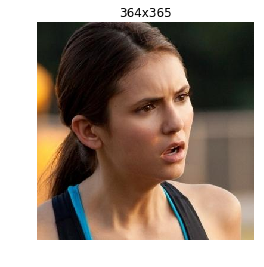

In [19]:
filename = data['full_path_crop'][194425]
test_image = mpimg.imread(filename)[:, :, :channels]
print(filename)
plt.title("{}x{}".format(test_image.shape[1], test_image.shape[0]))
plt.imshow(test_image)
plt.axis("off")
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:39: DeprecationWarning:

`imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.



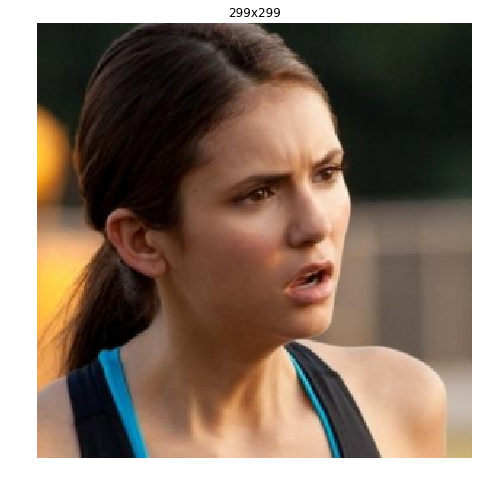

In [20]:
prepared_image = prepare_image(test_image, training = False)

plt.figure(figsize=(8, 8))
plt.imshow(prepared_image)
plt.title("{}x{}".format(prepared_image.shape[1], prepared_image.shape[0]))
plt.axis("off")
plt.show()

In [21]:
prepared_image = 2 * prepared_image - 1

In [22]:
prepared_image.shape

(299, 299, 3)

Download the latest pretrained Inception v3 model: the checkpoint is available at https://github.com/tensorflow/models/tree/master/research/slim. The list of class names is available at https://goo.gl/brXRtZ, but you must insert a "background" class at the beginning.

In [23]:
import sys
import tarfile
from six.moves import urllib

TF_MODELS_URL = "http://download.tensorflow.org/models"
INCEPTION_V3_URL = TF_MODELS_URL + "/inception_v3_2016_08_28.tar.gz"
INCEPTION_PATH = os.path.join("datasets", "inception")
INCEPTION_V3_CHECKPOINT_PATH = os.path.join(INCEPTION_PATH, "inception_v3.ckpt")

def download_progress(count, block_size, total_size):
    percent = count * block_size * 100 // total_size
    sys.stdout.write("\rDownloading: {}%".format(percent))
    sys.stdout.flush()

def fetch_pretrained_inception_v3(url=INCEPTION_V3_URL, path=INCEPTION_PATH):
    if os.path.exists(INCEPTION_V3_CHECKPOINT_PATH):
        return
    os.makedirs(path)
    tgz_path = os.path.join(path, "inception_v3.tgz")
    urllib.request.urlretrieve(url, tgz_path, reporthook=download_progress)
    inception_tgz = tarfile.open(tgz_path)
    inception_tgz.extractall(path=path)
    inception_tgz.close()
    os.remove(tgz_path)

In [24]:
fetch_pretrained_inception_v3()

In [25]:
import re

CLASS_NAME_REGEX = re.compile(r"^n\d+\s+(.*)\s*$", re.M | re.U)

def load_class_names():
    with open(os.path.join("datasets", "inception", "imagenet_class_names.txt"), "rb") as f:
        content = f.read().decode("utf-8")
        return CLASS_NAME_REGEX.findall(content)

## 3.2. Transfer learning 

Creamos el nuevo target:

In [26]:
"""
age_classes = ['0-20','20-30','30-40','40-50','50-60','60-70','70-']
age_classes

"""
age_classes = ['0-10',
               '10-15',
               '15-20',
               '20-25',
               '25-30',
               '30-35',
               '35-40',
               '40-45',
               '45-50',
               '50-55',
               '55-60',
               '60-65',
               '65-70',
               '70-']
age_classes


[u'0-10',
 u'10-15',
 u'15-20',
 u'20-25',
 u'25-30',
 u'30-35',
 u'35-40',
 u'40-45',
 u'45-50',
 u'50-55',
 u'55-60',
 u'60-65',
 u'65-70',
 u'70-']

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:39: DeprecationWarning:

`imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.



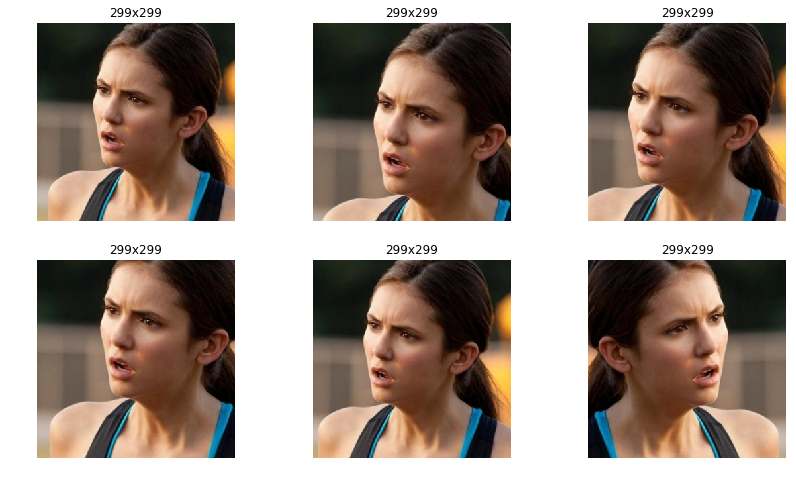

In [27]:
rows, cols = 2, 3

plt.figure(figsize=(14, 8))
for row in range(rows):
    for col in range(cols):
        prepared_image = prepare_image(test_image)
        plt.subplot(rows, cols, row * cols + col + 1)
        plt.title("{}x{}".format(prepared_image.shape[1], prepared_image.shape[0]))
        plt.imshow(prepared_image)
        plt.axis("off")
plt.show()

Looks good!

Alternatively, it's also possible to implement this image preprocessing step directly with TensorFlow, using the functions in the tf.image module (see the API for the full list). As you can see, this function looks very much like the one above, except it does not actually perform the image transformation, but rather creates a set of TensorFlow operations that will perform the transformation when you run the graph.

Using the pretrained Inception v3 model from the previous exercise, freeze all layers up to the bottleneck layer (i.e., the last layer before the output layer), and replace the output layer with the appropriate number of outputs for your new classification task (e.g., the flowers dataset has five mutually exclusive classes so the output layer must have five neurons and use the softmax activation function).

Let's start by fetching the inception v3 graph again. This time, let's use a training placeholder that we will use to tell TensorFlow whether we are training the network or not (this is needed by operations such as dropout and batch normalization).


In [28]:
from tensorflow.contrib.slim.nets import inception
import tensorflow.contrib.slim as slim

reset_graph()

X = tf.placeholder(tf.float32, shape=[None, height, width, channels], name="X")
training = tf.placeholder_with_default(False, shape=[])
with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits, end_points = inception.inception_v3(X, num_classes=1001, is_training=training)

inception_saver = tf.train.Saver()

In [29]:
end_points

{'AuxLogits': <tf.Tensor 'InceptionV3/AuxLogits/SpatialSqueeze:0' shape=(?, 1001) dtype=float32>,
 'Conv2d_1a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_1a_3x3/Relu:0' shape=(?, 149, 149, 32) dtype=float32>,
 'Conv2d_2a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_2a_3x3/Relu:0' shape=(?, 147, 147, 32) dtype=float32>,
 'Conv2d_2b_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_2b_3x3/Relu:0' shape=(?, 147, 147, 64) dtype=float32>,
 'Conv2d_3b_1x1': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_3b_1x1/Relu:0' shape=(?, 73, 73, 80) dtype=float32>,
 'Conv2d_4a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_4a_3x3/Relu:0' shape=(?, 71, 71, 192) dtype=float32>,
 'Logits': <tf.Tensor 'InceptionV3/Logits/SpatialSqueeze:0' shape=(?, 1001) dtype=float32>,
 'MaxPool_3a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/MaxPool_3a_3x3/MaxPool:0' shape=(?, 73, 73, 64) dtype=float32>,
 'MaxPool_5a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/MaxPool_5a_3x3/MaxPool:0' shape=(?, 35, 35, 192) dtype=floa

In [30]:
end_points["PreLogits"]

<tf.Tensor 'InceptionV3/Logits/Dropout_1b/cond/Merge:0' shape=(?, 1, 1, 2048) dtype=float32>

We can drop the 2nd and 3rd dimensions using the tf.squeeze() function:

In [31]:
prelogits = tf.squeeze(end_points["PreLogits"], axis=[1, 2])

Then we can add the final fully connected layer on top of this layer:

In [32]:
n_outputs = len(age_classes)

with tf.name_scope("new_output_layer"):
    age_logits = tf.layers.dense(prelogits, n_outputs, name="age_logits")
    #bn1 = tf.layers.batch_normalization(age_logits, training=training, momentum=0.9)
    #bn1_act = tf.nn.elu(bn1)

    #Y_proba = tf.nn.softmax(bn1_act, name="Y_proba")
    Y_proba = tf.nn.softmax(age_logits, name="Y_proba")

Finally, we need to add the usual bits and pieces:

   - the placeholder for the targets (y),
   - the loss function, which is the cross-entropy, as usual for a classification task,
   - an optimizer, that we use to create a training operation that will minimize the cost function,
   - a couple operations to measure the model's accuracy,
   - and finally an initializer and a saver.

There is one important detail, however: since we want to train only the output layer (all other layers must be frozen), we must pass the list of variables to train to the optimizer's minimize() method:

In [33]:
learning_rate = 0.0005
y = tf.placeholder(tf.int32, shape=[None])

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=age_logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    #optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    age_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="age_logits")
    training_op = optimizer.minimize(loss, var_list=age_vars)

    loss_train_summary = tf.summary.scalar('loss_train', loss)
    loss_test_summary = tf.summary.scalar('loss_test', loss)
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(age_logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

    accuracy_train_summary = tf.summary.scalar('accuracy_train', accuracy)
    accuracy_test_summary = tf.summary.scalar('accuracy_test', accuracy)
    
with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

In [34]:
[v.name for v in age_vars]

[u'age_logits/kernel:0', u'age_logits/bias:0']

Notice that we created the inception_saver before adding the new output layer: we will use this saver to restore the pretrained model state, so we don't want it to try to restore new variables (it would just fail saying it does not know the new variables). The second saver will be used to save the final gender model, including both the pretrained variables and the new ones.

Split your dataset into a training set and a test set. Train the model on the training set and evaluate it on the test set.

First, we will want to represent the classes as ints rather than strings:


In [35]:
age_class_ids = {age_class: index for index, age_class in enumerate(age_classes)}
age_class_ids

{u'0-10': 0,
 u'10-15': 1,
 u'15-20': 2,
 u'20-25': 3,
 u'25-30': 4,
 u'30-35': 5,
 u'35-40': 6,
 u'40-45': 7,
 u'45-50': 8,
 u'50-55': 9,
 u'55-60': 10,
 u'60-65': 11,
 u'65-70': 12,
 u'70-': 13}

It will be easier to shuffle the dataset set if we represent it as a list of filepath/class pairs:


In [36]:
from collections import defaultdict

image_paths = defaultdict(list)

for age_class in age_class_ids:
    print(age_class,age_class_ids[age_class])
    for i,p in enumerate(data[data['age_class']==age_class_ids[age_class]]['full_path_crop']):
        image_paths[age_class].append(p)

70- 13
30-35 5
65-70 12
60-65 11
0-10 0
10-15 1
25-30 4
40-45 7
45-50 8
35-40 6
55-60 10
15-20 2
50-55 9
20-25 3


In [37]:
age_paths_and_classes = []
for age_class, paths in image_paths.items():
    for path in paths:
        age_paths_and_classes.append((path, age_class_ids[age_class]))

In [38]:
len(age_paths_and_classes)

16800

Next, lets shuffle the dataset and split it into the training set and the test set:


In [39]:
"""
test_ratio = 0.2
train_size = int(len(age_paths_and_classes) * (1 - test_ratio))

np.random.shuffle(age_paths_and_classes)

age_paths_and_classes_train = age_paths_and_classes[:train_size]
age_paths_and_classes_test = age_paths_and_classes[train_size:]
"""

u'\ntest_ratio = 0.2\ntrain_size = int(len(age_paths_and_classes) * (1 - test_ratio))\n\nnp.random.shuffle(age_paths_and_classes)\n\nage_paths_and_classes_train = age_paths_and_classes[:train_size]\nage_paths_and_classes_test = age_paths_and_classes[train_size:]\n'

In [40]:
from sklearn.model_selection import train_test_split

# Split stratified to conserve label proportions in train and test sets
paths_tr, paths_val, y_train, y_test = train_test_split(pd.DataFrame(age_paths_and_classes)[0],
                                                        pd.DataFrame(age_paths_and_classes)[1],
                                                        stratify = pd.DataFrame(age_paths_and_classes)[1], 
                                                        random_state=42,
                                                        test_size=0.01)

In [41]:
age_paths_and_classes_train = zip(paths_tr,y_train)
age_paths_and_classes_test = zip(paths_val,y_test)

In [42]:
print(len(age_paths_and_classes_train),len(age_paths_and_classes_test))

16632 168


Let's look at the first 3 instances in the training set:


In [43]:
age_paths_and_classes_train[:3]

[('./datasets/imdb_crop/83/nm0707983_rm3687484160_1974-5-17_2006.jpg', 5),
 ('./datasets/imdb_crop/11/nm0695511_rm1640222976_1931-6-7_2011.jpg', 13),
 ('./datasets/imdb_crop/80/nm1071580_rm1869715712_1996-1-5_2002.jpg', 0)]

In [44]:
age_paths_and_classes[:3]

[('./datasets/imdb_crop/95/nm0455895_rm2342452736_1976-7-30_2009.jpg', 5),
 ('./datasets/imdb_crop/97/nm1046097_rm3893137152_1978-11-17_2010.jpg', 5),
 ('./datasets/imdb_crop/38/nm0000138_rm3477637632_1974-11-11_2009.jpg', 5)]

Next, we will also need a function to preprocess a set of images. This function will be useful to preprocess the test set, and also to create batches during training. For simplicity, we will use the NumPy/SciPy implementation:


In [45]:
from random import sample

def prepare_batch(age_paths_and_classes, batch_size):
    batch_paths_and_classes = sample(age_paths_and_classes, batch_size)
    images = []
    y =[]
    for path, labels in batch_paths_and_classes:
        if(len(mpimg.imread(path).shape)>2):
            images.append(mpimg.imread(path)[:, :, :channels])
            y.append(labels)
                
    prepared_images = [prepare_image(image, training = True) for image in images]
    X_batch = 2 * np.stack(prepared_images) - 1 # Inception expects colors ranging from -1 to 1
    y_batch = np.array(y, dtype=np.int32)
    return X_batch, y_batch

def prepare_batch_paths(age_paths_and_classes, batch_size):
    batch_paths_and_classes = sample(age_paths_and_classes, batch_size)
    images = []
    y =[]
    paths_batch = []
    for path, labels in batch_paths_and_classes:
        if(len(mpimg.imread(path).shape)>2):
            images.append(mpimg.imread(path)[:, :, :channels])
            y.append(labels)
            paths_batch.append(path)
    prepared_images = [prepare_image(image) for image in images]
    X_batch = 2 * np.stack(prepared_images) - 1 # Inception expects colors ranging from -1 to 1
    y_batch = np.array(y, dtype=np.int32)
    return X_batch, y_batch, paths_batch


In [46]:
X_batch, y_batch, paths_batch = prepare_batch_paths(age_paths_and_classes_train, batch_size=28)
#X_batch, y_batch, paths_batch = prepare_batch_paths(age_paths_and_classes_train, batch_size=len(age_paths_and_classes_train))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:39: DeprecationWarning:

`imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.



array([ 6, 13,  0, 13,  8, 10,  5, 11, 13, 13,  7,  8, 13,  5,  6,  0,  7,
        5,  6,  2,  2, 11,  1,  0,  4, 10,  8, 11], dtype=int32)

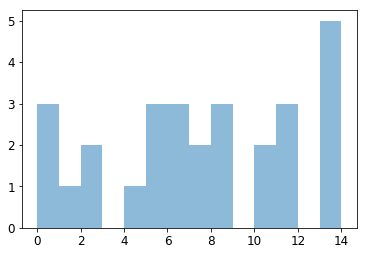

In [47]:
plt.hist(y_batch, bins=14,range=[0,14], alpha=0.5)
y_batch

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:39: DeprecationWarning:

`imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.



(array([129., 148., 143., 138., 142., 146., 130., 120., 157., 149., 133.,
        161., 143., 161.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14.]),
 <a list of 14 Patch objects>)

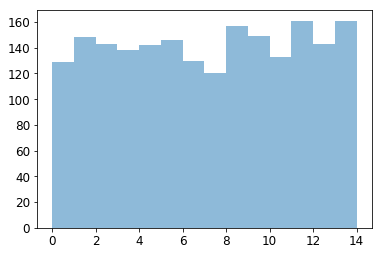

In [48]:
##Not run
y=[]
for i in range(10):
    X_batch, y_batch, paths_batch = prepare_batch_paths(age_paths_and_classes, batch_size=40)
    y.extend(y_batch[:])
plt.hist(y, bins=14,range=[0,14], alpha=0.5)


In [48]:
len(y)

TypeError: object of type 'Tensor' has no len()

Looking good. Now let's use this function to prepare the test set:


In [48]:
len(age_paths_and_classes_test)

168

In [49]:
X_test, y_test, paths_test = prepare_batch_paths(age_paths_and_classes_test, batch_size=len(age_paths_and_classes_test))
#X_test, y_test, paths_test = prepare_batch_paths(age_paths_and_classes_test, batch_size=4000)
#X_test, y_test, paths_test = prepare_batch_paths(age_paths_and_classes, batch_size=100)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:39: DeprecationWarning:

`imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.



In [50]:
X_test.shape

(168, 299, 299, 3)

In [51]:
#np.save('X_test2_imdb-N4000.npy', X_test)
#np.save('y_test2_imdb_N4000.npy', y_test)
#np.save('paths_test2_imdb_N4000.npy', paths_test)


In [52]:
len(paths_test)

168

(array([12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12.,
        12.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14.]),
 <a list of 14 Patch objects>)

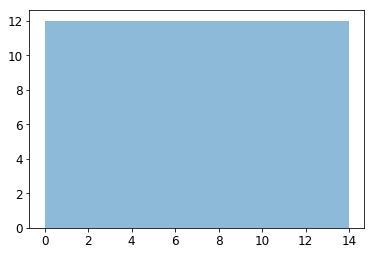

In [53]:
plt.hist(y_test, bins=14,range=[0,14], alpha=0.5)

We could prepare the training set in much the same way, but it would only generate one variant for each image. Instead, it's preferable to generate the training batches on the fly during training, so that we can really benefit from data augmentation, with many variants of each image.

And now, we are ready to train the network (or more precisely, the output layer we just added, since all the other layers are frozen). Be aware that this may take a (very) long time.


(array([1188., 1188., 1188., 1188., 1188., 1188., 1188., 1188., 1188.,
        1188., 1188., 1188., 1188., 1188.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14.]),
 <a list of 14 Patch objects>)

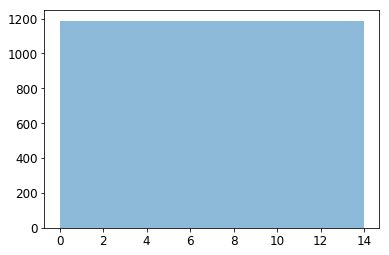

In [54]:
plt.hist([label for path, label in age_paths_and_classes_train], bins=14,range=[0,14], alpha=0.5)


In [55]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)
logdir = log_dir("ages_imdb-14cat")
#logdir = log_dir("ages_wiki")

In [56]:
n_epochs = 50
batch_size = 28
n_batches = len(age_paths_and_classes_train) // batch_size

checkpoint_path = logdir+"/models/my_ages_model_imdb.ckpt"
#checkpoint_path = logdir+"/models/my_ages_model_wiki.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = logdir+"/models/my_ages_model_imdb"+"_lr"+str(learning_rate)
#final_model_path = logdir+"/models/my_ages_model_wiki"+"_lr"+str(learning_rate)

best_loss = np.infty
epochs_without_progress = 0
max_epochs_without_progress = 15

# create log writer object
writer = tf.summary.FileWriter(logdir, graph=tf.get_default_graph())

with tf.Session() as sess:
    
    writer.add_graph(sess.graph)
    
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)
        inception_saver.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)

    for epoch in range(n_epochs):
        print("Epoch", epoch, end="")
        for iteration in range(n_batches):
            print(".", end="")
            X_batch, y_batch = prepare_batch(age_paths_and_classes_train, batch_size)
            #print("Batch sizes : ",X_batch.shape, y_batch.shape)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training: True})
            #print("Training batch done")

            #if iteration % 10 == 0:
            if iteration % 10 == 0:
                feed = {X: X_batch, y: y_batch}
                result = sess.run([accuracy_train_summary, loss_train_summary], feed_dict=feed)
                
                acc_train_sum = result[0]
                loss_train_sum = result[1]
                
                acc_test_sum = sess.run(accuracy_test_summary,feed_dict={X: X_test, y: y_test})
                loss_test_sum = sess.run(loss_test_summary,feed_dict={X: X_test, y: y_test})
                
                writer.add_summary(acc_train_sum, epoch * n_batches + iteration)
                writer.add_summary(acc_test_sum, epoch * n_batches + iteration)
                writer.add_summary(loss_train_sum, epoch * n_batches + iteration)
                writer.add_summary(loss_test_sum, epoch * n_batches + iteration)
                
            if iteration % 20 == 0:
                saver.save(sess, checkpoint_path)

        #acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        #print("  Train accuracy:", acc_train)
        
        #Checkpoint save to resume training and implement early stopping
        if epoch % 5 == 0:
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))
            if loss_test_sum < best_loss:
                saver.save(sess, final_model_path)
                best_loss = loss_test_sum
            else:
                epochs_without_progress += 5
                if epochs_without_progress > max_epochs_without_progress:
                    print("Early stopping")
                    break
                    
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        loss_train = loss.eval(feed_dict={X: X_batch, y: y_batch})
        loss_test = loss.eval(feed_dict={X: X_test, y: y_test})
        
        print("Train: accuracy ", acc_train," Loss ",loss_train, "Test: accuracy ", acc_test,  "Loss ",loss_test)

        #save_path = saver.save(sess, "./my_ages_model_ChaLearn")
        saver.save(sess, final_model_path)

INFO:tensorflow:Restoring parameters from datasets/inception/inception_v3.ckpt
Epoch 0.

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:39: DeprecationWarning:

`imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.



.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................Train: accuracy  0.14285715  Loss  2.6517508 Test: accuracy  0.065476194 Loss  2.681635
Epoch 1........................................................................................................................................................................................................................................................................................................................

Epoch 12..................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................Train: accuracy  0.10714286  Loss  2.6345875 Test: accuracy  0.10119048 Loss  2.599262
Epoch 13...............................................................................................................................................................................................................................................................................................................

## 3.3 Test on custom images

./datasets/yacine.jpeg


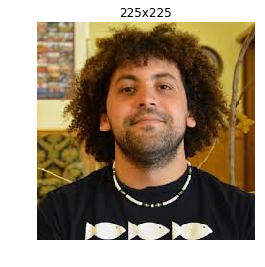

In [57]:
import matplotlib.image as mpimg
#filename = data_wiki['full_path_crop'][160]
#filename = data['full_path_crop'][49731]
#filename = data['full_path_crop'][25622] ## 86
#filename = data['full_path_crop'][38512]  ## 13
#filename = './datasets/imdb_crop/71/nm0551171_rm916238336_1965-6-19_1977.jpg' ##12
#filename = './datasets/imdb_crop/86/nm0001786_rm741463552_1937-4-20_2014.jpg' ##77
#filename = './datasets/imdb_crop/84/nm0604784_rm2141773056_1981-5-16_2013.jpg' ##32

#filename = './datasets/wiki_crop/62/38984162_1997-10-20_2015.jpg'
#filename = './datasets/ChaLearn/train/000434.jpg'
#filename = './datasets/ChaLearn/train/000432.jpg'
#filename = "./datasets/test.jpeg"
#filename = "./datasets/elodie.jpeg"
#filename = "./datasets/ivo.jpeg"
#filename = "./datasets/bebe.jpg"
filename = "./datasets/yacine.jpeg"
test_image = mpimg.imread(filename)[:, :, :channels]
print(filename)
plt.title("{}x{}".format(test_image.shape[1], test_image.shape[0]))
plt.imshow(test_image)
plt.axis("off")
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:39: DeprecationWarning:

`imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.



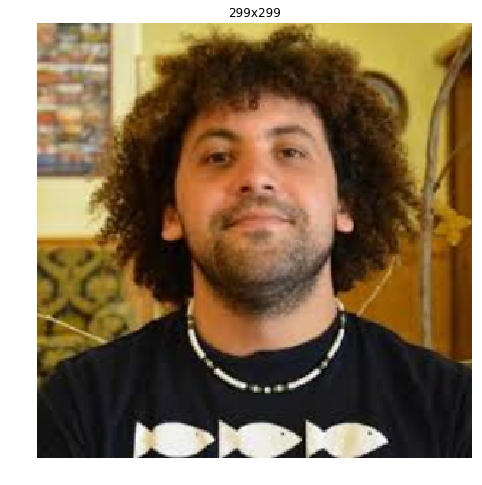

In [58]:
prepared_image = prepare_image(test_image, training = False)
plt.figure(figsize=(8, 8))
plt.imshow(prepared_image)
plt.title("{}x{}".format(prepared_image.shape[1], prepared_image.shape[0]))
plt.axis("off")
plt.show()

In [59]:
#final_model_path = "./logs/ages_imdb-run-20180504114639/models/my_ages_model_imdb_lr0.0001"
#final_model_path = "./logs/ages_imdb-run-20180507120010/models/my_ages_model_imdb.meta"
#final_model_path = "./logs/ages_imdb-14cat-run-20180511082712/models/my_ages_model_imdb_lr5e-05"

final_model_path

u'logs/ages_imdb-14cat-run-20180514132350//models/my_ages_model_imdb_lr0.0005'

In [60]:
prepared_image = 2 * prepared_image - 1
X_test_im = prepared_image.reshape(-1, height, width, channels)

with tf.Session() as sess:
    #saver.restore(sess, "./my_ages_model")
    saver.restore(sess, final_model_path)
    predictions = sess.run(Y_proba, feed_dict={X: X_test_im})
    #predictions_val = accuracy.eval(feed_dict={X: X_test})

INFO:tensorflow:Restoring parameters from logs/ages_imdb-14cat-run-20180514132350//models/my_ages_model_imdb_lr0.0005


In [61]:
most_likely_class_index = np.argmax(predictions[0])
most_likely_class_index

2

In [62]:
top = np.argpartition(predictions[0], -7)[-7:]
#top = np.argpartition(predictions[0], -14)[-14:]
top = reversed(top[np.argsort(predictions[0][top])])
for i in top:
    print("{0}: {1:.2f}%".format(age_classes[i], 100 * predictions[0][i]))

15-20: 17.28%
60-65: 10.85%
55-60: 8.81%
70-: 8.69%
65-70: 8.55%
25-30: 6.77%
45-50: 6.35%


## 3.4 See some photos labeled incorrectly:

In [136]:
X_test, y_test, paths_test = prepare_batch_paths(age_paths_and_classes_test, batch_size=100)

n_test_batches = 1
X_test_batches = np.array_split(X_test, n_test_batches)
y_test_batches = np.array_split(y_test, n_test_batches)
paths_test_batches = np.array_split(paths_test, n_test_batches)

predictions_test_batch = []
with tf.Session() as sess:
    #saver.restore(sess, "./my_genders_model")
    saver.restore(sess, final_model_path)
    for X_test_i in X_test_batches[0]:
        prepared_image = prepare_image(X_test_i, training = False)
        prepared_image = 2 * prepared_image - 1
        prepared_image = prepared_image.reshape(-1, height, width, channels)
        predictions_test_batch.append(sess.run(Y_proba, feed_dict={X: prepared_image}))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning:

`imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.



INFO:tensorflow:Restoring parameters from logs/ages_wiki-run-20180502125623//models/my_ages_model_wiki_lr0.0001


In [141]:
print(len(y_test_batches[0]),len(predictions_test_batch),len(paths_test_batches[0]))

89 89 89


In [142]:
c=0
for i in range(len(y_test_batches[0])):
    #print(predictions_test_batch[i],y_test_batches[0][i],paths_test_batches[0][i])
    print(np.argmax(predictions_test_batch[i]),
          y_test_batches[0][i], 
          np.argmax(predictions_test_batch[i])== y_test_batches[0][i],
          paths_test_batches[0][i])
          #paths_test_batches)
    if (np.argmax(predictions_test_batch[i])== y_test_batches[0][i]):c+=1
print(c/len(predictions_test_batch))

3 3 True ./datasets/wiki_crop/88/8006688_1961-03-14_2007.jpg
2 0 False ./datasets/wiki_crop/82/39237482_1990-05-14_2007.jpg
3 5 False ./datasets/wiki_crop/23/1941523_1942-02-16_2007.jpg
3 4 False ./datasets/wiki_crop/14/18266214_1888-07-30_1945.jpg
5 5 True ./datasets/wiki_crop/78/18794778_1904-05-07_1969.jpg
3 2 False ./datasets/wiki_crop/44/20537844_1920-11-16_1952.jpg
1 1 True ./datasets/wiki_crop/52/42176252_1991-12-07_2014.jpg
1 1 True ./datasets/wiki_crop/68/32740168_1990-05-19_2012.jpg
2 0 False ./datasets/wiki_crop/19/9941819_1996-02-07_2014.jpg
4 5 False ./datasets/wiki_crop/47/22846547_1941-10-31_2002.jpg
2 1 False ./datasets/wiki_crop/97/41108497_1989-03-06_2012.jpg
3 5 False ./datasets/wiki_crop/35/1859035_1939-01-08_2007.jpg
3 5 False ./datasets/wiki_crop/20/206120_1941-01-21_2006.jpg
1 0 False ./datasets/wiki_crop/52/2698152_1922-06-01_1941.jpg
2 4 False ./datasets/wiki_crop/70/20120170_1949-02-10_2008.jpg
3 5 False ./datasets/wiki_crop/96/222096_1939-05-19_2007.jpg
2 1 F

## Wrongly Predicted Over 70 (class 6)  

./datasets/wiki_crop/98/238398_1922-06-10_2011.jpg


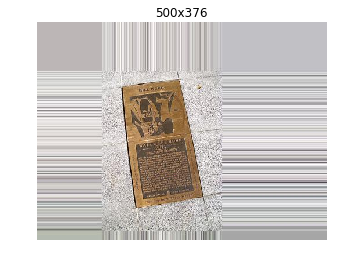

In [150]:
filename = "./datasets/wiki_crop/98/238398_1922-06-10_2011.jpg"## true 5 60-70
test_image = mpimg.imread(filename)[:, :, :channels]
print(filename)
plt.title("{}x{}".format(test_image.shape[1], test_image.shape[0]))
plt.imshow(test_image)
plt.axis("off")
plt.show()

./datasets/wiki_crop/42/20015042_1910-06-30_2005.jpg


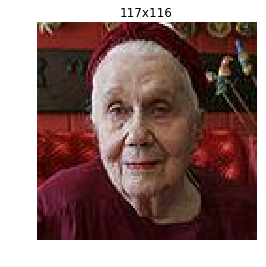

In [151]:
filename = "./datasets/wiki_crop/42/20015042_1910-06-30_2005.jpg"## true 4 50-60
test_image = mpimg.imread(filename)[:, :, :channels]
print(filename)
plt.title("{}x{}".format(test_image.shape[1], test_image.shape[0]))
plt.imshow(test_image)
plt.axis("off")
plt.show()

./datasets/wiki_crop/81/294181_1932-08-11_2012.jpg


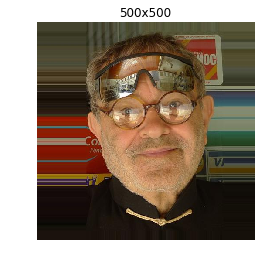

In [152]:
filename = "./datasets/wiki_crop/81/294181_1932-08-11_2012.jpg"## true 3 40-50
test_image = mpimg.imread(filename)[:, :, :channels]
print(filename)
plt.title("{}x{}".format(test_image.shape[1], test_image.shape[0]))
plt.imshow(test_image)
plt.axis("off")
plt.show()

## True Over 70 predicted wrong

In [171]:
age_paths_and_class_6_test = [(path,age) for path,age in age_paths_and_classes_test if age == 6]

In [172]:
X_test_6, y_test_6, paths_test_6 = prepare_batch_paths(age_paths_and_class_6_test, batch_size=100)

n_test_batches = 1
X_test_batches_6 = np.array_split(X_test_6, n_test_batches)
y_test_batches_6 = np.array_split(y_test_6, n_test_batches)
paths_test_batches_6 = np.array_split(paths_test_6, n_test_batches)

predictions_test_batch_6 = []
with tf.Session() as sess:
    #saver.restore(sess, "./my_genders_model")
    saver.restore(sess, final_model_path)
    for X_test_i in X_test_batches_6[0]:
        prepared_image = prepare_image(X_test_i, training = False)
        prepared_image = 2 * prepared_image - 1
        prepared_image = prepared_image.reshape(-1, height, width, channels)
        predictions_test_batch_6.append(sess.run(Y_proba, feed_dict={X: prepared_image}))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning:

`imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.



INFO:tensorflow:Restoring parameters from logs/ages_wiki-run-20180502125623//models/my_ages_model_wiki_lr0.0001


In [173]:
print(len(y_test_batches_6[0]),len(predictions_test_batch_6),len(paths_test_batches_6[0]))

92 92 92


In [175]:
c=0
for i in range(len(y_test_batches_6[0])):
    #print(predictions_test_batch[i],y_test_batches[0][i],paths_test_batches[0][i])
    print(np.argmax(predictions_test_batch_6[i]),
          y_test_batches_6[0][i], 
          np.argmax(predictions_test_batch_6[i])== y_test_batches_6[0][i],
          paths_test_batches_6[0][i])
          #paths_test_batches)
    if (np.argmax(predictions_test_batch_6[i])== y_test_batches_6[0][i]):c+=1
print(c/len(predictions_test_batch_6))

5 6 False ./datasets/wiki_crop/08/412908_1925-10-11_2011.jpg
3 6 False ./datasets/wiki_crop/88/20738388_1928-10-06_2010.jpg
4 6 False ./datasets/wiki_crop/55/20358755_1929-01-28_2012.jpg
3 6 False ./datasets/wiki_crop/20/19821120_1825-07-11_1950.jpg
6 6 True ./datasets/wiki_crop/74/37002174_1859-12-24_2011.jpg
5 6 False ./datasets/wiki_crop/40/6334340_1928-04-02_2006.jpg
5 6 False ./datasets/wiki_crop/15/3966815_1926-08-06_2010.jpg
3 6 False ./datasets/wiki_crop/28/3228328_1924-07-20_2000.jpg
4 6 False ./datasets/wiki_crop/52/9959752_1897-12-24_2006.jpg
3 6 False ./datasets/wiki_crop/67/18425667_1928-03-15_2009.jpg
4 6 False ./datasets/wiki_crop/21/11565121_1920-05-09_2008.jpg
5 6 False ./datasets/wiki_crop/37/28057037_1933-05-20_2009.jpg
4 6 False ./datasets/wiki_crop/96/30863296_1922-09-15_2006.jpg
4 6 False ./datasets/wiki_crop/31/308131_1931-06-09_2006.jpg
3 6 False ./datasets/wiki_crop/55/638055_1930-01-04_2009.jpg
0 6 False ./datasets/wiki_crop/01/24517301_1878-08-23_1950.jpg
6 6

### Some true predictions:

./datasets/wiki_crop/25/1473225_1898-07-21_2009.jpg


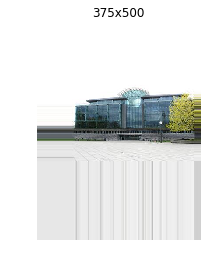

In [182]:
filename = "./datasets/wiki_crop/25/1473225_1898-07-21_2009.jpg"## true 6
test_image = mpimg.imread(filename)[:, :, :channels]
print(filename)
plt.title("{}x{}".format(test_image.shape[1], test_image.shape[0]))
plt.imshow(test_image)
plt.axis("off")
plt.show()

./datasets/wiki_crop/59/469859_1922-06-18_2002.jpg


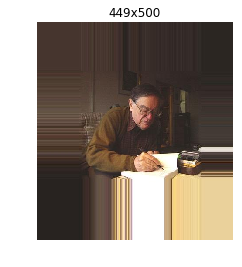

In [185]:
filename = "./datasets/wiki_crop/59/469859_1922-06-18_2002.jpg"## true 6
test_image = mpimg.imread(filename)[:, :, :channels]
print(filename)
plt.title("{}x{}".format(test_image.shape[1], test_image.shape[0]))
plt.imshow(test_image)
plt.axis("off")
plt.show()

I see what is wrong.. Over 70 are only city photos...

## Wrong classified true class 6

./datasets/wiki_crop/21/14321_1934-02-05_2013.jpg


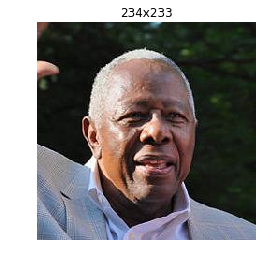

In [190]:
filename = "./datasets/wiki_crop/21/14321_1934-02-05_2013.jpg"## predicted 2
test_image = mpimg.imread(filename)[:, :, :channels]
print(filename)
plt.title("{}x{}".format(test_image.shape[1], test_image.shape[0]))
plt.imshow(test_image)
plt.axis("off")
plt.show()

./datasets/wiki_crop/85/1350285_1926-11-06_2009.jpg


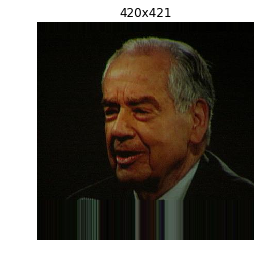

In [191]:
filename = "./datasets/wiki_crop/85/1350285_1926-11-06_2009.jpg"## predicted 3
test_image = mpimg.imread(filename)[:, :, :channels]
print(filename)
plt.title("{}x{}".format(test_image.shape[1], test_image.shape[0]))
plt.imshow(test_image)
plt.axis("off")
plt.show()

./datasets/wiki_crop/23/8724323_1926-12-06_2008.jpg


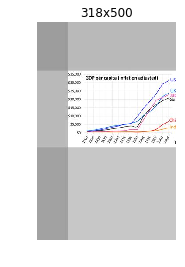

In [193]:
filename = "./datasets/wiki_crop/23/8724323_1926-12-06_2008.jpg"## predicted 5
test_image = mpimg.imread(filename)[:, :, :channels]
print(filename)
plt.title("{}x{}".format(test_image.shape[1], test_image.shape[0]))
plt.imshow(test_image)
plt.axis("off")
plt.show()

## 3.5 Confusion Matrix

In [187]:
X_batch, y_batch, paths_batch = prepare_batch_paths(age_paths_and_classes_train, batch_size=42)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning:

`imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.



In [64]:
# 14 categories
#X_test = np.load('X_test_imdb.npy')
#y_test = np.load('y_test_imdb.npy')

# 7 categories
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')


In [65]:
print(len(X_test),len(X_batch))

907 28


In [66]:
n_test_batches = 14
X_test_batches = np.array_split(X_test, n_test_batches)
y_test_batches = np.array_split(y_test, n_test_batches)

#n_test_batches = 14
#X_test_batches = np.array_split(X_batch, n_test_batches)
#y_test_batches = np.array_split(y_batch, n_test_batches)


In [67]:
final_model_path

u'logs/ages_imdb-7cat-run-20180510102013//models/my_ages_model_imdb_lr0.0001'

In [68]:
predictions_test = []
with tf.Session() as sess:
    #saver.restore(sess, "./my_ages_model")
    #saver.restore(sess, "./my_ages_model_ChaLearn")
    #saver.restore(sess, "./logs/ages_chalearn-run-20180430064942/models/my_ages_model_ChaLearn")
    #saver.restore(sess, './logs/ages_imdb-run-20180507143820//models/my_ages_model_imdb_lr0.001')
    #saver.restore(sess, './logs/ages_imdb-run-20180504114639//models/my_ages_model_imdb_lr0.0001')
    saver.restore(sess, final_model_path)
    for batch in range(len(X_test_batches)):
        for X_test_i in X_test_batches[batch]:
            prepared_image = prepare_image(X_test_i, training = False)
            prepared_image = 2 * prepared_image - 1
            prepared_image = prepared_image.reshape(-1, height, width, channels)
            predictions_test.append(sess.run(Y_proba, feed_dict={X: prepared_image}))

INFO:tensorflow:Restoring parameters from logs/ages_imdb-7cat-run-20180510102013//models/my_ages_model_imdb_lr0.0001


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:39: DeprecationWarning:

`imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.



In [69]:
predictions_test

[array([[0.05085172, 0.07267322, 0.10508119, 0.10954614, 0.50536823,
         0.08902214, 0.06745732]], dtype=float32),
 array([[0.22442469, 0.26401806, 0.15679651, 0.10581864, 0.13774498,
         0.06685929, 0.0443378 ]], dtype=float32),
 array([[0.12202149, 0.35250148, 0.19210896, 0.12964582, 0.11078253,
         0.05300203, 0.03993781]], dtype=float32),
 array([[0.08790889, 0.28700054, 0.19739453, 0.08078355, 0.11258498,
         0.11586792, 0.11845958]], dtype=float32),
 array([[0.15506656, 0.290377  , 0.10192832, 0.20425747, 0.14728957,
         0.04610366, 0.05497736]], dtype=float32),
 array([[0.0745906 , 0.21444516, 0.0922313 , 0.25538537, 0.19924423,
         0.0868616 , 0.0772417 ]], dtype=float32),
 array([[0.12948616, 0.3836968 , 0.15861948, 0.08109055, 0.08312057,
         0.07968316, 0.08430329]], dtype=float32),
 array([[0.15275474, 0.21928318, 0.11412515, 0.1289902 , 0.1705608 ,
         0.13944152, 0.07484443]], dtype=float32),
 array([[0.1514336 , 0.16945131, 0.16568

In [70]:
predict = [np.argmax(predictions_test[i]) for i in range(len(predictions_test))]
true = [item for sublist in y_test_batches for item in sublist]
print(len(predict),len(true))

907 907


In [71]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [72]:
from sklearn.metrics import confusion_matrix
import itertools
# Compute confusion matrix
cnf_matrix = confusion_matrix(true, predict)
np.set_printoptions(precision=2)

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(true, predict)

0.19073869900771775

In [74]:
#top k accuracy
k = 3
np.sum(true [i] in np.argsort(predictions_test[i], axis=1)[0][-k:] for i in range(len(predictions_test)))/len(predictions_test)


0.5413450937155457

Confusion matrix, without normalization
[[24 61  4  8 13  3  3]
 [30 56  4 19 25  2  2]
 [27 45  3 24 38  4  0]
 [14 42  1 31 30  2  3]
 [12 28  3 44 45  2  4]
 [ 8 18  3 25 55  3  2]
 [13 16  3 24 66  4 11]]
Saving figure 2-age-confusion-matrix-imdb-7cat-lr0.0001


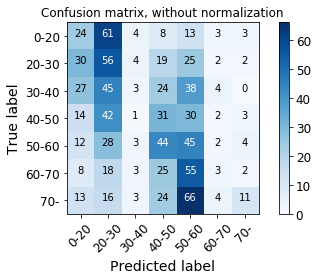

In [75]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=age_classes,
                      title='Confusion matrix, without normalization')
save_fig("2-age-confusion-matrix-imdb-7cat"+"-lr"+str(learning_rate))
#save_fig("2-age-confusion-matrix-imdb-Ntest4000"+"-lr"+str(learning_rate))
plt.show()

Normalized confusion matrix
[[0.21 0.53 0.03 0.07 0.11 0.03 0.03]
 [0.22 0.41 0.03 0.14 0.18 0.01 0.01]
 [0.19 0.32 0.02 0.17 0.27 0.03 0.  ]
 [0.11 0.34 0.01 0.25 0.24 0.02 0.02]
 [0.09 0.2  0.02 0.32 0.33 0.01 0.03]
 [0.07 0.16 0.03 0.22 0.48 0.03 0.02]
 [0.09 0.12 0.02 0.18 0.48 0.03 0.08]]
Saving figure 2-age-confusion-matrix-imdb-7cat-norm-lr0.0001


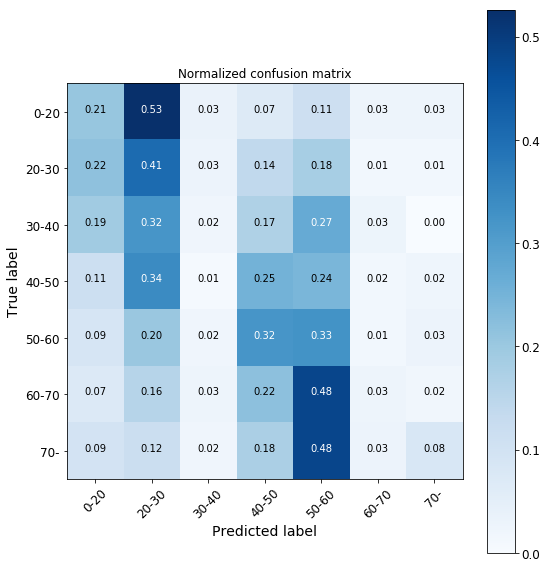

In [76]:
# Plot normalized confusion matrix
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=age_classes, normalize=True,
                      title='Normalized confusion matrix')
save_fig("2-age-confusion-matrix-imdb-7cat-norm"+"-lr"+str(learning_rate))
plt.show()

## 3.6 Explore problem in class 5 (30-35)

Almost no instances are predicted with label 5.. Check training examples with label 5:

In [205]:
age_paths_and_class_5_train = [(path,age) for path,age in age_paths_and_classes_train if age == 5]

In [206]:
len(age_paths_and_class_5_train)

1989

In [165]:
age_paths_and_class_5_test = [(path,age) for path,age in age_paths_and_classes_test if age == 5]

In [201]:
print(len(age_paths_and_class_5_test),len(age_paths_and_class_5_train))

511 1989


In [172]:
X_test_5, y_test_5, paths_test_5 = prepare_batch_paths(age_paths_and_class_5_test, batch_size=len(age_paths_and_class_5_test))

n_test_batches = 1
X_test_batches_5 = np.array_split(X_test_5, n_test_batches)
y_test_batches_5 = np.array_split(y_test_5, n_test_batches)
paths_test_batches_5 = np.array_split(paths_test_5, n_test_batches)

predictions_test_batch_5 = []
with tf.Session() as sess:
    #saver.restore(sess, "./my_genders_model")
    saver.restore(sess, final_model_path)
    for X_test_i in X_test_batches_5[0]:
        prepared_image = prepare_image(X_test_i, training = False)
        prepared_image = 2 * prepared_image - 1
        prepared_image = prepared_image.reshape(-1, height, width, channels)
        predictions_test_batch_5.append(sess.run(Y_proba, feed_dict={X: prepared_image}))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning:

`imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.



INFO:tensorflow:Restoring parameters from ./logs/ages_imdb-run-20180504114639/models/my_ages_model_imdb_lr0.0001


In [173]:
print(len(y_test_batches_5[0]),len(predictions_test_batch_5),len(paths_test_batches_5[0]))

482 482 482


In [174]:
c=0
for i in range(len(y_test_batches_5[0])):
    #print(predictions_test_batch[i],y_test_batches[0][i],paths_test_batches[0][i])
    print(np.argmax(predictions_test_batch_5[i]),
          y_test_batches_5[0][i], 
          np.argmax(predictions_test_batch_5[i])== y_test_batches_5[0][i],
          paths_test_batches_5[0][i])
          #paths_test_batches)
    if (np.argmax(predictions_test_batch_5[i])== y_test_batches_5[0][i]):c+=1
print(c/len(predictions_test_batch_5))

7 5 False ./datasets/imdb_crop/28/nm0763928_rm2661781248_1975-8-22_2009.jpg
7 5 False ./datasets/imdb_crop/22/nm0266422_rm856856064_1974-9-19_2008.jpg
0 5 False ./datasets/imdb_crop/10/nm0000210_rm1640208384_1967-10-28_2000.jpg
6 5 False ./datasets/imdb_crop/79/nm0272479_rm996443392_1975-10-22_2009.jpg
6 5 False ./datasets/imdb_crop/28/nm0579728_rm665823232_1980-4-18_2011.jpg
2 5 False ./datasets/imdb_crop/70/nm0000170_rm2221640960_1975-12-17_2007.jpg
0 5 False ./datasets/imdb_crop/61/nm1036361_rm2487532544_1971-9-8_2005.jpg
7 5 False ./datasets/imdb_crop/66/nm1209966_rm4202156800_1980-3-9_2013.jpg
0 5 False ./datasets/imdb_crop/08/nm0915208_rm1047444480_1968-9-28_2002.jpg
9 5 False ./datasets/imdb_crop/02/nm0001002_rm2075039744_1966-7-31_2000.jpg
2 5 False ./datasets/imdb_crop/10/nm0005110_rm3383725824_1978-2-7_2010.jpg
2 5 False ./datasets/imdb_crop/84/nm0126284_rm2557313536_1979-7-24_2010.jpg
9 5 False ./datasets/imdb_crop/80/nm0000680_rm1716099840_1968-12-18_2000.jpg
2 5 False ./da

(array([41., 10., 49., 22., 83.,  3., 99., 56., 23., 72.,  6., 12.,  3.,
         3.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14.]),
 <a list of 14 Patch objects>)

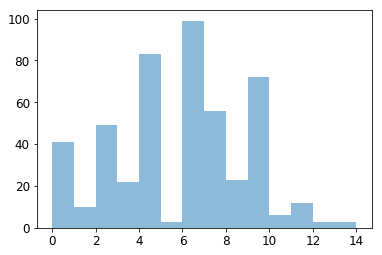

In [179]:
plt.hist([np.argmax(predictions_test_batch_5[i]) for i in range(len(y_test_batches_5[0]))],
         bins=14,range=[0,14], alpha=0.5)

In [214]:
def plotimage(filename):
    test_image = mpimg.imread(filename)[:, :, :channels]
    print(filename)
    plt.title("{}x{}".format(test_image.shape[1], test_image.shape[0]))
    plt.imshow(test_image)
    plt.axis("off")
    plt.show()

./datasets/imdb_crop/95/nm0709095_rm1308278016_1977-10-6_2011.jpg


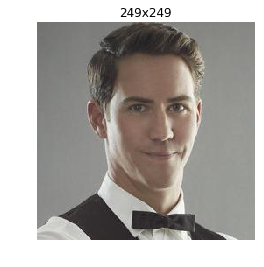

./datasets/imdb_crop/67/nm0001667_rm464228096_1977-7-27_2010.jpg


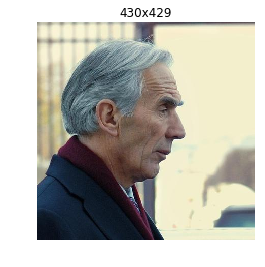

./datasets/imdb_crop/66/nm1519666_rm2258945280_1982-1-6_2014.jpg


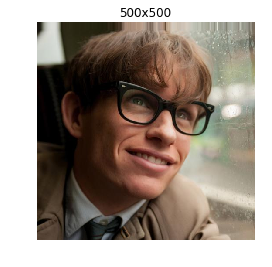

./datasets/imdb_crop/97/nm0001497_rm1309775872_1975-6-27_2007.jpg


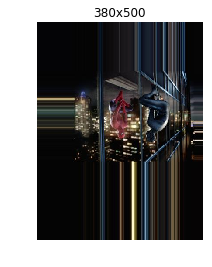

In [215]:
## predicted 11
plotimage("./datasets/imdb_crop/95/nm0709095_rm1308278016_1977-10-6_2011.jpg")   
plotimage("./datasets/imdb_crop/67/nm0001667_rm464228096_1977-7-27_2010.jpg")   
plotimage("./datasets/imdb_crop/66/nm1519666_rm2258945280_1982-1-6_2014.jpg")    
plotimage("./datasets/imdb_crop/97/nm0001497_rm1309775872_1975-6-27_2007.jpg")  


./datasets/imdb_crop/02/nm0001002_rm2075039744_1966-7-31_2000.jpg


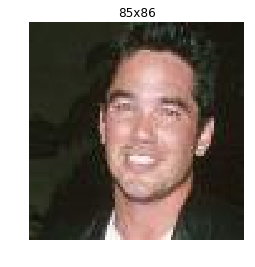

./datasets/imdb_crop/80/nm0000680_rm1716099840_1968-12-18_2000.jpg


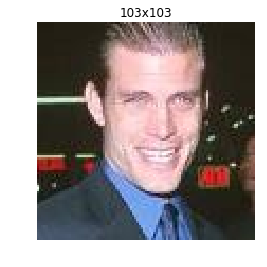

./datasets/imdb_crop/39/nm0855039_rm3789719808_1971-4-18_2005.jpg


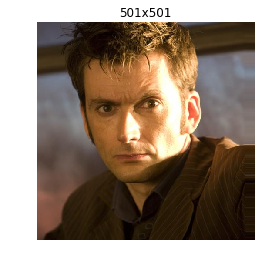

./datasets/imdb_crop/08/nm0000708_rm3545078272_1966-2-24_1997.jpg


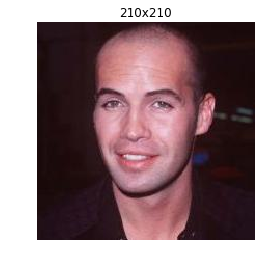

./datasets/imdb_crop/00/nm0500200_rm4145597696_1982-4-10_2014.jpg


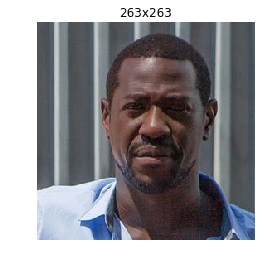

./datasets/imdb_crop/64/nm0035664_rm191416576_1953-11-27_1985.jpg


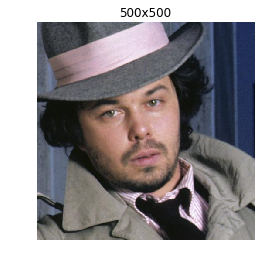

./datasets/imdb_crop/38/nm1379938_rm1519296768_1979-7-15_2013.jpg


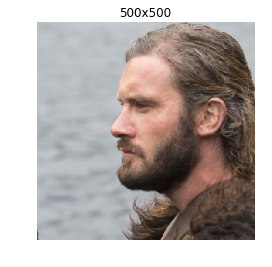

./datasets/imdb_crop/31/nm0674231_rm4101687296_1948-3-31_1982.jpg


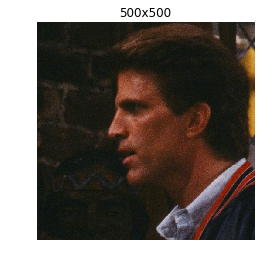

./datasets/imdb_crop/79/nm1078479_rm2447421952_1977-4-23_2011.jpg


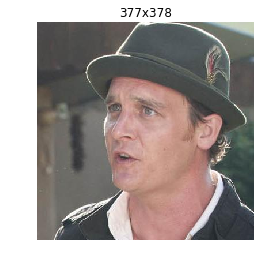

In [217]:
## predicted 9
plotimage("./datasets/imdb_crop/02/nm0001002_rm2075039744_1966-7-31_2000.jpg")
plotimage("./datasets/imdb_crop/80/nm0000680_rm1716099840_1968-12-18_2000.jpg")
plotimage("./datasets/imdb_crop/39/nm0855039_rm3789719808_1971-4-18_2005.jpg")
plotimage("./datasets/imdb_crop/08/nm0000708_rm3545078272_1966-2-24_1997.jpg")
plotimage("./datasets/imdb_crop/00/nm0500200_rm4145597696_1982-4-10_2014.jpg")
plotimage("./datasets/imdb_crop/64/nm0035664_rm191416576_1953-11-27_1985.jpg")
plotimage("./datasets/imdb_crop/38/nm1379938_rm1519296768_1979-7-15_2013.jpg")
plotimage("./datasets/imdb_crop/31/nm0674231_rm4101687296_1948-3-31_1982.jpg")
plotimage("./datasets/imdb_crop/79/nm1078479_rm2447421952_1977-4-23_2011.jpg")


./datasets/imdb_crop/13/nm1567113_rm501004544_1977-3-24_2011.jpg


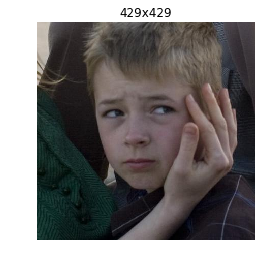

./datasets/imdb_crop/86/nm1643086_rm1008503552_1978-8-6_2009.jpg


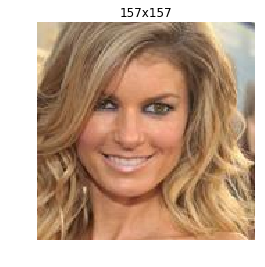

./datasets/imdb_crop/64/nm0001264_rm3188371968_1977-4-14_2011.jpg


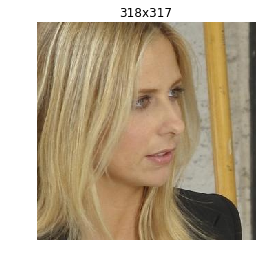

./datasets/imdb_crop/60/nm0726360_rm2595340032_1978-8-24_2011.jpg


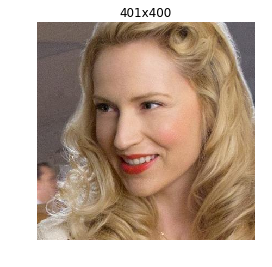

./datasets/imdb_crop/34/nm0000234_rm2677508864_1975-8-7_2008.jpg


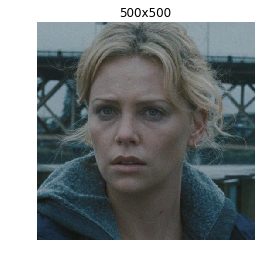

In [226]:
## predicted 2
plotimage("./datasets/imdb_crop/13/nm1567113_rm501004544_1977-3-24_2011.jpg")
plotimage("./datasets/imdb_crop/86/nm1643086_rm1008503552_1978-8-6_2009.jpg")
plotimage("./datasets/imdb_crop/64/nm0001264_rm3188371968_1977-4-14_2011.jpg")
plotimage("./datasets/imdb_crop/60/nm0726360_rm2595340032_1978-8-24_2011.jpg")
plotimage("./datasets/imdb_crop/34/nm0000234_rm2677508864_1975-8-7_2008.jpg")

./datasets/imdb_crop/72/nm0702572_rm3031081728_1979-5-22_2010.jpg


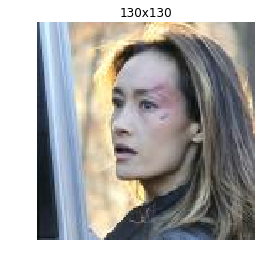

./datasets/imdb_crop/97/nm0822597_rm2203557120_1971-6-15_2003.jpg


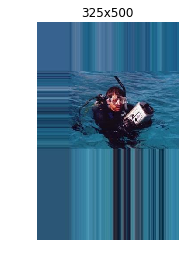

./datasets/imdb_crop/36/nm0010736_rm2904265728_1974-8-20_2008.jpg


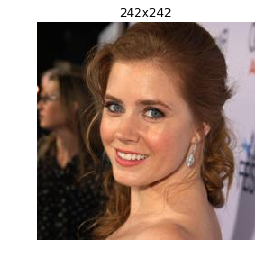

./datasets/imdb_crop/64/nm1065664_rm677153536_1978-4-26_2009.jpg


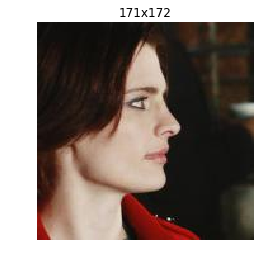

In [219]:
## predicted 3
plotimage("./datasets/imdb_crop/72/nm0702572_rm3031081728_1979-5-22_2010.jpg")
plotimage("./datasets/imdb_crop/97/nm0822597_rm2203557120_1971-6-15_2003.jpg")
plotimage("./datasets/imdb_crop/36/nm0010736_rm2904265728_1974-8-20_2008.jpg")
plotimage("./datasets/imdb_crop/64/nm1065664_rm677153536_1978-4-26_2009.jpg")


./datasets/imdb_crop/89/nm0915989_rm2215216128_1960-4-4_1994.jpg


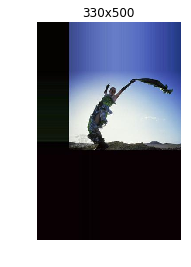

./datasets/imdb_crop/54/nm1065454_rm1828624640_1974-4-11_2007.jpg


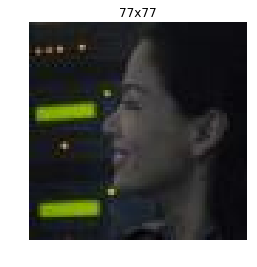

In [239]:
## predicted 5
plotimage("./datasets/imdb_crop/89/nm0915989_rm2215216128_1960-4-4_1994.jpg")
plotimage("./datasets/imdb_crop/54/nm1065454_rm1828624640_1974-4-11_2007.jpg")


Maybe there is some pattern in the predicted probabilities for this label

In [151]:
predict = [np.argmax(predictions_test[i]) for i in range(len(predictions_test))]
true = [item for sublist in y_test_batches for item in sublist]
print(len(predict),len(true))

2662 2662


In [141]:
true

[11,
 5,
 11,
 11,
 11,
 10,
 6,
 12,
 5,
 7,
 9,
 9,
 12,
 3,
 8,
 13,
 6,
 10,
 11,
 2,
 3,
 7,
 4,
 3,
 6,
 5,
 6,
 1,
 8,
 8,
 3,
 4,
 5,
 9,
 8,
 2,
 8,
 1,
 4,
 8,
 7,
 2,
 8,
 13,
 13,
 13,
 7,
 10,
 9,
 11,
 12,
 13,
 2,
 4,
 7,
 5,
 13,
 6,
 2,
 12,
 2,
 13,
 8,
 13,
 12,
 5,
 11,
 13,
 8,
 7,
 0,
 5,
 7,
 2,
 3,
 1,
 5,
 13,
 8,
 0,
 6,
 6,
 1,
 3,
 0,
 3,
 2,
 2,
 13,
 11,
 2,
 11,
 12,
 3,
 10,
 11,
 1,
 1,
 0,
 1,
 10,
 5,
 11,
 13,
 6,
 5,
 5,
 11,
 13,
 0,
 2,
 11,
 6,
 3,
 1,
 3,
 4,
 2,
 13,
 8,
 6,
 2,
 13,
 7,
 8,
 2,
 6,
 9,
 8,
 5,
 10,
 2,
 7,
 7,
 9,
 1,
 7,
 3,
 8,
 2,
 7,
 13,
 0,
 2,
 12,
 1,
 12,
 11,
 1,
 10,
 8,
 9,
 1,
 9,
 10,
 3,
 8,
 3,
 2,
 5,
 4,
 3,
 13,
 8,
 1,
 1,
 0,
 1,
 9,
 10,
 9,
 1,
 5,
 6,
 2,
 9,
 10,
 9,
 4,
 3,
 5,
 6,
 4,
 10,
 13,
 0,
 1,
 11,
 12,
 12,
 10,
 1,
 2,
 3,
 5,
 11,
 7,
 9,
 12,
 11,
 0,
 2,
 0,
 11,
 3,
 1,
 13,
 6,
 10,
 2,
 4,
 7,
 2,
 11,
 12,
 9,
 1,
 12,
 9,
 3,
 6,
 2,
 5,
 3,
 3,
 11,
 9,
 0,
 11,
 6,
 2,
 4,
 13,
 

(array([322.,  71., 308.,  87., 457.,   9., 462., 216., 133., 414.,  40.,
         87.,  16.,  40.,   0.]),
 array([ 0.  ,  0.93,  1.87,  2.8 ,  3.73,  4.67,  5.6 ,  6.53,  7.47,
         8.4 ,  9.33, 10.27, 11.2 , 12.13, 13.07, 14.  ]),
 <a list of 15 Patch objects>)

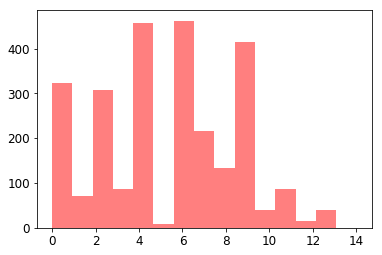

In [212]:

plt.hist(predict, bins=15,range=[0,14], alpha=0.5,color='r')


In [163]:
[predictions_test[i] for i in range(len(predictions_test))][1][0]

array([0.16, 0.08, 0.02, 0.04, 0.1 , 0.04, 0.16, 0.09, 0.04, 0.1 , 0.03,
       0.07, 0.04, 0.04], dtype=float32)

In [157]:
predict_proba = [predictions_test[i] for i in range(len(predictions_test))]

In [159]:
predict_proba[0][0]

array([0.04, 0.03, 0.05, 0.02, 0.1 , 0.07, 0.17, 0.11, 0.08, 0.11, 0.07,
       0.08, 0.04, 0.04], dtype=float32)

In [160]:
predict_proba[0][0][5] - predict_proba[0][0][4]

-0.022199206

In [162]:
predict_proba[1][0][5] - predict_proba[1][0][6]

-0.11931188

In [213]:
proba_0 = [predict_proba[i][0][0] for i in range(len(true)) if true[i]==5]
proba_1 = [predict_proba[i][0][1] for i in range(len(true)) if true[i]==5]
proba_2 = [predict_proba[i][0][2] for i in range(len(true)) if true[i]==5]
proba_3 = [predict_proba[i][0][3] for i in range(len(true)) if true[i]==5]
proba_4 = [predict_proba[i][0][4] for i in range(len(true)) if true[i]==5]
proba_5 = [predict_proba[i][0][5] for i in range(len(true)) if true[i]==5]
proba_6 = [predict_proba[i][0][6] for i in range(len(true)) if true[i]==5]
proba_7 = [predict_proba[i][0][7] for i in range(len(true)) if true[i]==5]
proba_8 = [predict_proba[i][0][8] for i in range(len(true)) if true[i]==5]
proba_9 = [predict_proba[i][0][9] for i in range(len(true)) if true[i]==5]
proba_10 = [predict_proba[i][0][10] for i in range(len(true)) if true[i]==5]
proba_11 = [predict_proba[i][0][11] for i in range(len(true)) if true[i]==5]
proba_12 = [predict_proba[i][0][12] for i in range(len(true)) if true[i]==5]
proba_13 = [predict_proba[i][0][13] for i in range(len(true)) if true[i]==5]
diff_5_4 = [(predict_proba[i][0][5] - predict_proba[i][0][4]) for i in range(len(true)) if true[i]==5]
diff_6_5 = [(predict_proba[i][0][6] - predict_proba[i][0][5]) for i in range(len(true)) if true[i]==5]
pred_true5 = [predict[i] for i in range(len(true)) if true[i]==5]

In [182]:
print(len(diff_5_4),len(diff_6_5))

193 193


In [214]:
d = {'proba_0':proba_0,
     'proba_1':proba_1,
     'proba_2':proba_2,
     'proba_3':proba_3,
     'proba_4':proba_4,
     'proba_5':proba_5,
     'proba_6':proba_6,
     'proba_7':proba_7,
     'proba_8':proba_8,
     'proba_9':proba_9,
     'proba_10':proba_10,
     'proba_11':proba_11,
     'proba_12':proba_12,
     'proba_13':proba_13,
     'pred':pred_true5,'d54':diff_5_4,'d65':diff_6_5}
df = pd.DataFrame(d)
df

d54       d65  pred   proba_0   proba_1  proba_10  proba_11  \
0   -0.064672  0.119312     0  0.164442  0.082178  0.026571  0.068690   
1    0.026980  0.045794     6  0.028738  0.047203  0.042228  0.106812   
2   -0.034564  0.032316     4  0.034617  0.017251  0.077470  0.045754   
3   -0.000829 -0.000224     0  0.588342  0.325940  0.003234  0.002682   
4   -0.024130  0.113510     6  0.096642  0.048148  0.051251  0.067271   
5   -0.068423  0.038706     2  0.147339  0.116976  0.021983  0.020341   
6   -0.042090 -0.004804     2  0.068543  0.099009  0.014244  0.015092   
7   -0.026350  0.056019    10  0.072290  0.041606  0.102239  0.086723   
8   -0.131210 -0.001695     4  0.047430  0.063076  0.009037  0.009116   
9   -0.065940  0.029302     2  0.103766  0.083762  0.023200  0.015625   
10   0.020381  0.050367     9  0.027166  0.022976  0.087783  0.070551   
11  -0.057686  0.033311     2  0.081717  0.078428  0.011685  0.017675   
12  -0.016663  0.068686     8  0.016404  0.018620  0.067714  0.061326   
13  -0.059865  0.034207     2  0.138096  0.080498  0.014583  0.014748   
14  -0.089646  0.075506     3  0.032944  0.048073  0.064148  0.023347   
15  -0.014759 -0.019372     2  0.110773  0.130681  0.016812  0.026501   
16  -0.010308 -0.017649     0  0.174712  0.062342  0.057644  0.041632   
17   0.003933 -0.013870     2  0.128411  0.156377  0.023752  0.045720   
18  -0.024853  0.091156     9  0.019539  0.007257  0.047637  0.053915   
19  -0.063448  0.048444     0  0.119362  0.090734  0.045194  0.100363   
20  -0.029991  0.046534     1  0.082100  0.134789  0.021402  0.048177   
21  -0.017604 -0.020363     7  0.020719  0.024547  0.085548  0.068604   
22  -0.040189  0.105441     6  0.015530  0.008703  0.110244  0.077763   
23  -0.021310  0.066177     3  0.059471  0.067532  0.018152  0.088056   
24  -0.065982  0.013820     4  0.081510  0.079907  0.016577  0.024716   
25  -0.029268  0.057682    10  0.046628  0.018394  0.135959  0.090102   
26  -0.062787  0.085272     7  0.021031  0.014692  0.110578  0.047200   
27  -0.079361  0.144256     6  0.018227  0.019047  0.029995  0.026180   
28  -0.071255  0.117069     6  0.069702  0.063726  0.014593  0.021864   
29  -0.034548  0.029123     7  0.034280  0.030697  0.064296  0.051779   
..        ...       ...   ...       ...       ...       ...       ...   
163  0.007898  0.103614     6  0.067964  0.013156  0.091581  0.115880   
164 -0.063235  0.106854     6  0.146204  0.027252  0.044352  0.089754   
165 -0.170270  0.080658     4  0.151345  0.093295  0.026257  0.019701   
166 -0.048861  0.112752     6  0.101237  0.036995  0.048708  0.059167   
167 -0.151010  0.100128     4  0.107626  0.053068  0.028423  0.021655   
168 -0.060389  0.057760     9  0.072815  0.084409  0.028704  0.031427   
169 -0.013859  0.078584     6  0.059304  0.028132  0.069934  0.061061   
170 -0.058484  0.057770     0  0.115836  0.020927  0.078323  0.044655   
171 -0.068231  0.083673     6  0.016069  0.021103  0.055471  0.026433   
172 -0.039204  0.033824     9  0.031805  0.044058  0.068780  0.100520   
173 -0.109664 -0.002419     2  0.050735  0.097832  0.010911  0.008648   
174 -0.106733  0.029986     4  0.031438  0.055537  0.050892  0.053189   
175 -0.011514  0.010988     9  0.027424  0.085076  0.062081  0.055948   
176 -0.124795  0.003727     4  0.082402  0.046415  0.033431  0.050106   
177 -0.037411  0.100624     6  0.089279  0.041650  0.044459  0.041176   
178 -0.061314  0.086083     2  0.132321  0.059395  0.037592  0.037343   
179 -0.039700  0.045168     9  0.030579  0.049073  0.067637  0.076330   
180 -0.146345  0.073214     4  0.067089  0.034319  0.041292  0.069008   
181 -0.056913  0.132034     6  0.088604  0.048373  0.049032  0.032202   
182 -0.128340  0.032562     2  0.067174  0.064536  0.013222  0.014571   
183  0.044571 -0.033378     8  0.008940  0.014396  0.037634  0.036809   
184 -0.075040  0.037995     0  0.123032  0.105774  0.040998  0.072082   
185 -0.076231  0.066511     0  0.180981  0.049184  0.058676  0.04247

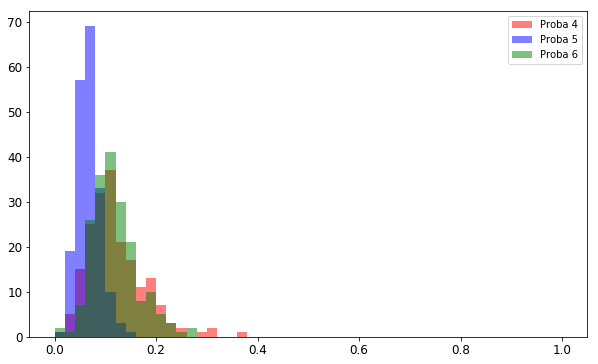

In [239]:
plt.figure(figsize=(10, 6))
#plt.hist(df.proba_0, bins=50,range=[0,1], alpha=0.5, label='Proba 0',color='y')
#plt.hist(df.proba_1, bins=50,range=[0,1], alpha=0.5, label='Proba 1',color='y')
#plt.hist(df.proba_2, bins=50,range=[0,1], alpha=0.5, label='Proba 2',color='y')
#plt.hist(df.proba_3, bins=50,range=[0,1], alpha=0.5, label='Proba 3',color='y')
#plt.hist(df.proba_8, bins=50,range=[0,1], alpha=0.5, label='Proba 8',color='y')
#plt.hist(df.proba_10, bins=50,range=[0,1], alpha=0.5, label='Proba 10',color='y')
#plt.hist(df.proba_11, bins=50,range=[0,1], alpha=0.5, label='Proba 11',color='y')
#plt.hist(df.proba_12, bins=50,range=[0,1], alpha=0.5, label='Proba 12',color='y')
#plt.hist(df.proba_13, bins=50,range=[0,1], alpha=0.5, label='Proba 13',color='y')

#plt.hist(df.proba_7, bins=50,range=[0,1], alpha=0.5, label='Proba 7',color='y')
#plt.hist(df.proba_9, bins=50,range=[0,1], alpha=0.5, label='Proba 9',color='k')

plt.hist(df.proba_4, bins=50,range=[0,1], alpha=0.5, label='Proba 4',color='r')
plt.hist(df.proba_5, bins=50,range=[0,1], alpha=0.5, label='Proba 5',color='b')
plt.hist(df.proba_6, bins=50,range=[0,1], alpha=0.5, label='Proba 6',color='g')
plt.legend()


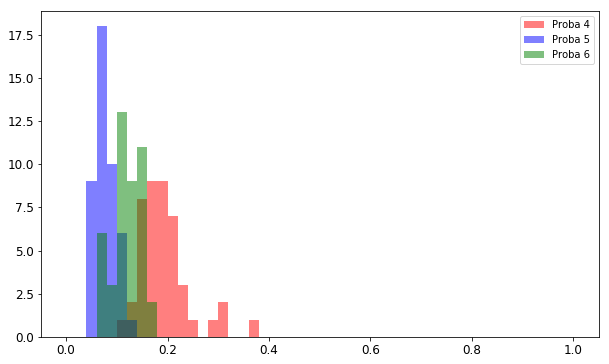

In [204]:
plt.figure(figsize=(10, 6))

plt.hist(df[df.pred==4].proba_4, bins=50,range=[0,1], alpha=0.5, label='Proba 4',color='r')
plt.hist(df[df.pred==4].proba_5, bins=50,range=[0,1], alpha=0.5, label='Proba 5',color='b')
plt.hist(df[df.pred==4].proba_6, bins=50,range=[0,1], alpha=0.5, label='Proba 6',color='g')

plt.legend()


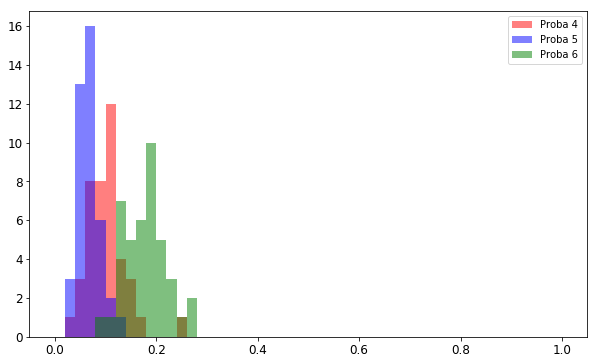

In [205]:
plt.figure(figsize=(10, 6))

plt.hist(df[df.pred==6].proba_4, bins=50,range=[0,1], alpha=0.5, label='Proba 4',color='r')
plt.hist(df[df.pred==6].proba_5, bins=50,range=[0,1], alpha=0.5, label='Proba 5',color='b')
plt.hist(df[df.pred==6].proba_6, bins=50,range=[0,1], alpha=0.5, label='Proba 6',color='g')

plt.legend()

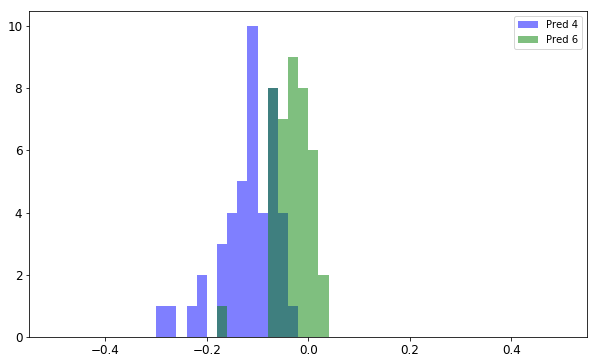

In [210]:
plt.figure(figsize=(10, 6))

plt.hist(df[df.pred==4].d54, bins=50,range=[-0.5,0.5], alpha=0.5, label='Pred 4',color='b')
plt.hist(df[df.pred==6].d54, bins=50,range=[-0.5,0.5], alpha=0.5, label='Pred 6',color='g')
plt.legend()


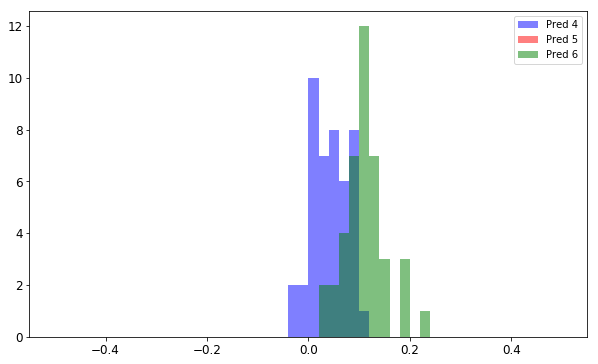

In [188]:
plt.figure(figsize=(10, 6))

plt.hist(df[df.pred==4].d65, bins=50,range=[-0.5,0.5], alpha=0.5, label='Pred 4',color='b')
plt.hist(df[df.pred==5].d65, bins=50,range=[-0.5,0.5], alpha=0.5, label='Pred 5',color='r')
plt.hist(df[df.pred==6].d65, bins=50,range=[-0.5,0.5], alpha=0.5, label='Pred 6',color='g')
plt.legend()


# 4. Test on ChaLearn Dataset

In [63]:
data_test = pd.read_csv("./datasets/ChaLearn/test_gt.csv")
data_test['full_path_crop'] = './datasets/ChaLearn/test/' + data_test['image'].astype(str)

In [64]:
"""
data_test["age_class"] = data_test['mean']
data_test.loc[(data_test['mean'] > 0) & (data_test['mean'] <= 20), 'age_class'] = 0
data_test.loc[(data_test['mean'] > 20) & (data_test['mean'] <= 30), 'age_class'] = 1
data_test.loc[(data_test['mean'] > 30) & (data_test['mean'] <= 40), 'age_class'] = 2
data_test.loc[(data_test['mean'] > 40) & (data_test['mean'] <= 50), 'age_class'] = 3
data_test.loc[(data_test['mean'] > 50) & (data_test['mean'] <= 60), 'age_class'] = 4
data_test.loc[(data_test['mean'] > 60) & (data_test['mean'] <= 70), 'age_class'] = 5
data_test.loc[(data_test['mean'] > 70) & (data_test['mean'] <= 100), 'age_class'] = 6
data_test["age_class"].value_counts()
"""
data_test.loc[(data_test['mean']>0) & (data_test['mean']<=10),'age_class']  = 0
data_test.loc[(data_test['mean']>10) & (data_test['mean']<=15),'age_class'] = 1
data_test.loc[(data_test['mean']>15) & (data_test['mean']<=20),'age_class'] = 2
data_test.loc[(data_test['mean']>20) & (data_test['mean']<=25),'age_class'] = 3
data_test.loc[(data_test['mean']>25) & (data_test['mean']<=30),'age_class'] = 4
data_test.loc[(data_test['mean']>30) & (data_test['mean']<=35),'age_class'] = 5
data_test.loc[(data_test['mean']>35) & (data_test['mean']<=40),'age_class'] = 6
data_test.loc[(data_test['mean']>40) & (data_test['mean']<=45),'age_class'] = 7
data_test.loc[(data_test['mean']>45) & (data_test['mean']<=50),'age_class'] = 8
data_test.loc[(data_test['mean']>50) & (data_test['mean']<=55),'age_class'] = 9
data_test.loc[(data_test['mean']>55) & (data_test['mean']<=60),'age_class'] = 10
data_test.loc[(data_test['mean']>60) & (data_test['mean']<=65),'age_class'] = 11
data_test.loc[(data_test['mean']>65) & (data_test['mean']<=70),'age_class'] = 12
data_test.loc[(data_test['mean']>70) & (data_test['mean']<=100),'age_class'] = 13
data_test['age_class'].value_counts()


4.0     380
5.0     266
0.0     222
3.0     200
6.0     197
7.0     133
8.0     111
2.0      93
9.0      87
13.0     71
11.0     60
10.0     59
1.0      55
12.0     44
Name: age_class, dtype: int64

In [65]:
from collections import defaultdict

image_paths_test = defaultdict(list)

for age_class in age_class_ids:
    print(age_class,age_class_ids[age_class])
    for i,p in enumerate(data_test[data_test['age_class']==age_class_ids[age_class]]['full_path_crop']):
        image_paths_test[age_class].append(p)

70- 13
30-35 5
65-70 12
60-65 11
0-10 0
10-15 1
25-30 4
40-45 7
45-50 8
35-40 6
55-60 10
15-20 2
50-55 9
20-25 3


In [66]:
age_paths_and_classes_test = []
for age_class, paths in image_paths_test.items():
    for path in paths:
        age_paths_and_classes_test.append((path, age_class_ids[age_class]))

In [67]:
len(age_paths_and_classes_test)

1978

In [68]:
X_test_cha, y_test_cha, paths_test_cha = prepare_batch_paths(age_paths_and_classes_test, batch_size=len(age_paths_and_classes_test))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:39: DeprecationWarning:

`imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.



In [69]:
n_test_batches = 28
X_test_batches = np.array_split(X_test_cha, n_test_batches)
y_test_batches = np.array_split(y_test_cha, n_test_batches)


In [70]:
#final_model_path = "./logs/ages_imdb-14cat-run-20180511082712/models/my_ages_model_imdb_lr5e-05" ## 7.6% acc
#final_model_path = "./logs/ages_imdb-run-20180504114639/models/my_ages_model_imdb_lr0.0001" ## 18.4% acc

final_model_path


u'logs/ages_imdb-14cat-run-20180514132350//models/my_ages_model_imdb_lr0.0005'

In [ ]:
predictions_test = []
with tf.Session() as sess:
    saver.restore(sess, final_model_path)
    for batch in range(len(X_test_batches)):
        for X_test_i in X_test_batches[batch]:
            prepared_image = prepare_image(X_test_i, training = False)
            prepared_image = 2 * prepared_image - 1
            prepared_image = prepared_image.reshape(-1, height, width, channels)
            predictions_test.append(sess.run(Y_proba, feed_dict={X: prepared_image}))

INFO:tensorflow:Restoring parameters from logs/ages_imdb-14cat-run-20180514132350//models/my_ages_model_imdb_lr0.0005


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:39: DeprecationWarning:

`imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.



In [80]:
predict = [np.argmax(predictions_test[i]) for i in range(len(predictions_test))]
true = [item for sublist in y_test_batches for item in sublist]
print(len(predict),len(true))

1936 1936


In [81]:
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import accuracy_score

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(true, predict)
np.set_printoptions(precision=2)

accuracy_score(true, predict)


0.18388429752066116

In [82]:
#top k accuracy
k = 3
np.sum(true [i] in np.argsort(predictions_test[i], axis=1)[0][-k:] for i in range(len(predictions_test)))/len(predictions_test)


0.4364669421487603

In [83]:
final_model_path

u'./logs/ages_imdb-run-20180504114639/models/my_ages_model_imdb_lr0.0001'

Confusion matrix, without normalization
[[149  29  12   1   6   1   3   2   3   0   1   1   1  12]
 [ 11  11   7   2   6   0   2   0   1   1   0   6   1   6]
 [ 16  10  17   7   8   1   5   8   4   4   2   3   3   5]
 [ 22  15  43  14  30   3  18  25  12   6   3   2   2   3]
 [ 31  21  42  38  67   6  41  73  17  11   4   6   5   5]
 [ 18  20  35  18  44   3  23  35  20  23   7   7   0   5]
 [ 23  11  19   6  21   3  22  33  14  16  12  10   2   3]
 [ 11   4   8   2  18   1  14  15  15  19   9   5   3   4]
 [ 11   4   9   3   6   2   8  13  20  12   6   6   2   8]
 [  6   6   2   0   5   3   9   9  12   9   4   8   3   9]
 [ 11   1   3   0   2   0   4   5   7   7   6   4   4   2]
 [  4   1   1   0   6   1   6   5   7   9   0   7   3   7]
 [  5   3   0   0   2   0   1   4   3  11   2   3   3   6]
 [ 22   3   1   0   2   1   2   2   4   7   0   8   6  13]]
Saving figure 3-age-Cha-confusion-matrix-imdb-14cat-20180504114639-lr-0.0001


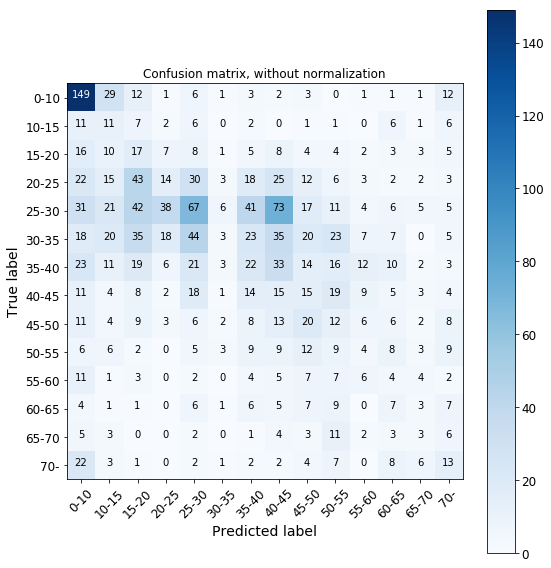

In [85]:
# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=age_classes,
                      title='Confusion matrix, without normalization')
save_fig("3-age-Cha-confusion-matrix-imdb-14cat-20180514132350"+"-lr-0.0005")
#save_fig("2-age-confusion-matrix-imdb-Ntest4000"+"-lr"+str(learning_rate))
plt.show()

Normalized confusion matrix
[[0.67 0.13 0.05 0.   0.03 0.   0.01 0.01 0.01 0.   0.   0.   0.   0.05]
 [0.2  0.2  0.13 0.04 0.11 0.   0.04 0.   0.02 0.02 0.   0.11 0.02 0.11]
 [0.17 0.11 0.18 0.08 0.09 0.01 0.05 0.09 0.04 0.04 0.02 0.03 0.03 0.05]
 [0.11 0.08 0.22 0.07 0.15 0.02 0.09 0.13 0.06 0.03 0.02 0.01 0.01 0.02]
 [0.08 0.06 0.11 0.1  0.18 0.02 0.11 0.2  0.05 0.03 0.01 0.02 0.01 0.01]
 [0.07 0.08 0.14 0.07 0.17 0.01 0.09 0.14 0.08 0.09 0.03 0.03 0.   0.02]
 [0.12 0.06 0.1  0.03 0.11 0.02 0.11 0.17 0.07 0.08 0.06 0.05 0.01 0.02]
 [0.09 0.03 0.06 0.02 0.14 0.01 0.11 0.12 0.12 0.15 0.07 0.04 0.02 0.03]
 [0.1  0.04 0.08 0.03 0.05 0.02 0.07 0.12 0.18 0.11 0.05 0.05 0.02 0.07]
 [0.07 0.07 0.02 0.   0.06 0.04 0.11 0.11 0.14 0.11 0.05 0.09 0.04 0.11]
 [0.2  0.02 0.05 0.   0.04 0.   0.07 0.09 0.12 0.12 0.11 0.07 0.07 0.04]
 [0.07 0.02 0.02 0.   0.11 0.02 0.11 0.09 0.12 0.16 0.   0.12 0.05 0.12]
 [0.12 0.07 0.   0.   0.05 0.   0.02 0.09 0.07 0.26 0.05 0.07 0.07 0.14]
 [0.31 0.04 0.01 0.   0

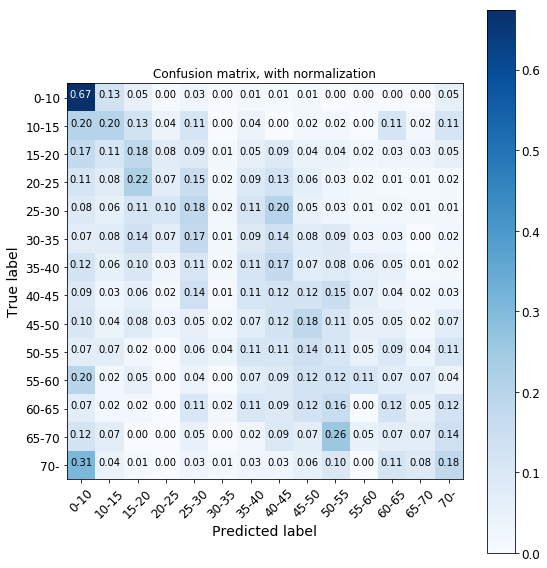

In [86]:
# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=age_classes,normalize=True,
                      title='Confusion matrix, with normalization')
save_fig("3-age-Cha-confusion-matrix-imdb-norm-14cat-20180514132350"+"-lr-0.0005")
plt.show()